##       ===== DATA SCIENCE PROJECT USING PYTHON =====

### ************************ Credit-card-Fraud Detection *****************************

### Presented by Yannick Sorel BENGA BENGUA

**Data source** : https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset/data

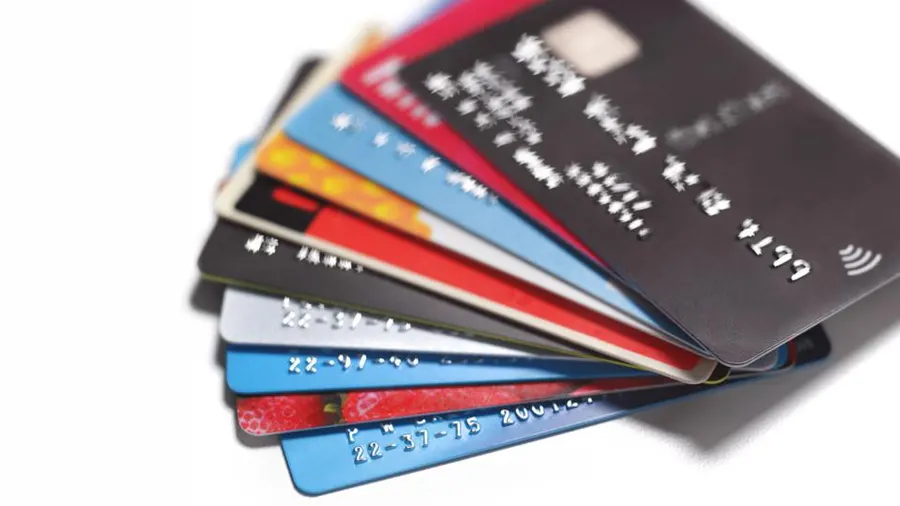

## Business problem

Credit card fraud is a significant concern for financial institutions and cardholders alike. Detecting fraudulent transactions in real-time is crutial to minimize financial losses and protect customers from unauthorized charges.

The goal of this project is to build a robust and accurante fraud detection model than can identify fraudulent transactions while minimizing false positives.

## Objectives

- Read and preprocess the data
  - Data cleaning
  - Exploratory Data Analysis (EDA)
- Build a model to predict the Target (Fraud detection)

## Feature Identification

- **Unnamed: 0:**  This is a generic identifier for the records in the dataset.
- **ID:**  Unique ID assigned to each person in the dataset.          
- **GENDER:** Indicates the gender of the individual.         
- **CAR:** Specifies whether the individual owns.             
- **REALITY:** Specifies whether the individual owns real estate.          
- **NO_OF_CHILD:** Represents the number of children associated with the individual.      
- **INCOME:** Indicates the income level or financial earnings of the individual.            
- **INCOME_TYPE:** Describes the type of income the individual receives.     
- **EDUCATION_TYPE:** Specifies the highest education level attained by the individual.    
- **FAMILY_TYPE:** Describes the family status or type of the individual.       
- **HOUSE_TYPE:** Specifies the type of housing the individual lives.        
- **FLAG_MOBIL:** Indicates whether the individual has a mobile phone.        
- **WORK_PHONE:** Indicates whether the individual has a work phon.         
- **PHONE:** Indicates whether the individual has a personal phone.             
- **E_MAIL:** Indicates whether the individual has an email address.           
- **FAMILY SIZE:** Represents the size of the individual's family.      
- **BEGIN_MONTH:** Indicates the month when the individual started using the card.       
- **AGE:** Represents the age of the individual.             
- **YEARS_EMPLOYED:** Represents the number of years the individual has been employed .  
- **TARGET:** This is the target variable, which is likely binary and indicates whether the individual is associated with a fraudulent transaction (e.g., 1 for fraud, 0 for non-fraud).

### Irrelevant features that we should drop

- **Unnamed: 0:**  This is a generic identifier for the records in the dataset.
- **FLAG_MOBIL:** Indicates whether the individual has a mobile phone.

## Hypothesis between Target and Categorical variables

- There is a statistically significant association between ‘Target’ and ‘gender’
- There is a statistically significant association between ‘Target’ and ‘car’
- There is a statistically significant association between ‘Target’ and ‘reality’
- There is a statistically significant association between ‘Target’ and ‘income_type’
- There is a statistically significant association between ‘Target’ and ‘Education_type’
- There is a statistically significant association between ‘Target’ and ‘Family_type’
- There is a statistically significant association between ‘Target’ and ‘House_type’

## Hypothesis between Target and Continuous variables

- There is a statistically significant association between ‘Target’ and ‘INCOME’
- There is a statistically significant association between ‘Target’ and ‘WORK_PHONE’
- There is a statistically significant association between ‘Target’ and ‘PHONE’
- There is a statistically significant association between ‘Target’ and ‘E_MAIL’
- There is a statistically significant association between ‘Target’ and ‘BEGIN_MONTH’
- There is a statistically significant association between ‘Target’ and ‘FAMILY SIZE’
- There is a statistically significant association between ‘Target’ and ‘AGE’
- There is a statistically significant association between ‘Target’ and ‘YEARS_EMPLOYED’

## Methodology

My methodology is described through the following steps:

- Drilling all features and their distribution.
- Exploring the relations between variables.
- Verifying the stated hypotheses.
- Data Preparation includes Performing missing value and outlier treatment and Using suitable techniques to treat the categorical columns
- Predict the Target
- Using appropriate evaluation metrics to assess model performance.
- Comparing models to find out which one works best based on the evaluation metrics mentioned in the previous point.
- Using model simplification techniques like feature creation and selection, to improve model predictability.

## Importing the Libraries

In [479]:
import warnings
warnings.filterwarnings("ignore")
# Importing the Numpy and Pandas packages
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [480]:
data = pd.read_csv('Credit-card-Fraud Detection.csv')
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0.00,2.00,29,59.00,3.00,0
1,1,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,4,52.00,8.00,0
2,2,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,26,52.00,8.00,0
3,3,5008810,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,26,52.00,8.00,0
4,4,5008811,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,NaN,38,52.00,8.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25311,25129,5149828,M,Y,Y,0,315000.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0.00,2.00,11,48.00,7.00,1
25312,25130,5149834,F,N,Y,0,157500.00,Commercial associate,Higher education,Married,House / apartment,1,0,1,1.00,2.00,23,34.00,4.00,1
25313,25131,5149838,F,N,Y,0,157500.00,Pensioner,Higher education,Married,House / apartment,1,0,1,1.00,2.00,32,34.00,4.00,1
25314,25132,5150049,F,N,Y,0,283500.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,NaN,2.00,9,NaN,2.00,1


### We have 20 features and 25316 observations

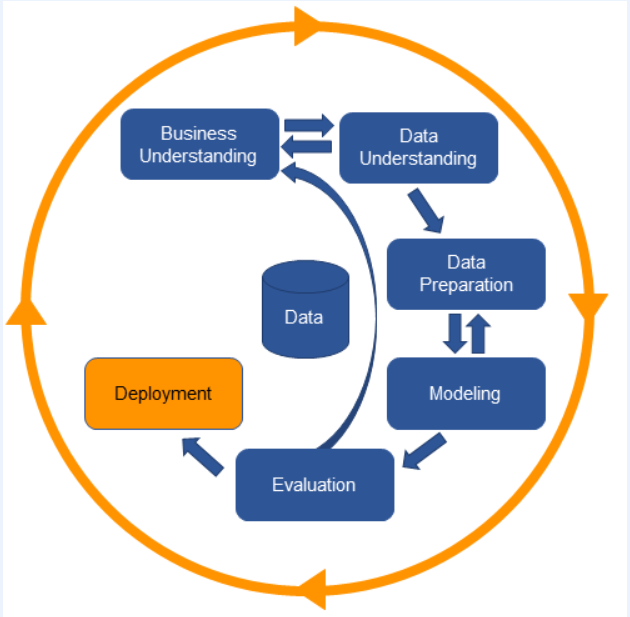

=================================================================================================

# -------------------  EDA(Exploratory Data Analysis)  ----------------

=================================================================================================

### Getting familar with data

### What are our columns

In [481]:
data.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [482]:
# Getting data types of variales
data.dtypes

Unnamed: 0          int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL            float64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE               float64
YEARS_EMPLOYED    float64
TARGET              int64
dtype: object

In [483]:
#checking  number of obs and columns ,index of columns, name of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25316 entries, 0 to 25315
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25316 non-null  int64  
 1   ID              25316 non-null  int64  
 2   GENDER          25296 non-null  object 
 3   CAR             25316 non-null  object 
 4   REALITY         25316 non-null  object 
 5   NO_OF_CHILD     25316 non-null  int64  
 6   INCOME          25283 non-null  float64
 7   INCOME_TYPE     25299 non-null  object 
 8   EDUCATION_TYPE  25316 non-null  object 
 9   FAMILY_TYPE     25316 non-null  object 
 10  HOUSE_TYPE      25316 non-null  object 
 11  FLAG_MOBIL      25316 non-null  int64  
 12  WORK_PHONE      25316 non-null  int64  
 13  PHONE           25316 non-null  int64  
 14  E_MAIL          25295 non-null  float64
 15  FAMILY SIZE     25306 non-null  float64
 16  BEGIN_MONTH     25316 non-null  int64  
 17  AGE             25277 non-null 

In [484]:
# Getting the head of the dataset
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0.00,2.00,29,59.00,3.00,0
1,1,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,4,52.00,8.00,0
2,2,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,26,52.00,8.00,0
3,3,5008810,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,1.00,26,52.00,8.00,0
4,4,5008811,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1.00,NaN,38,52.00,8.00,0


In [485]:
# Getting the tail of the dataset
data.tail()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
25311,25129,5149828,M,Y,Y,0,315000.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0.00,2.00,11,48.00,7.00,1
25312,25130,5149834,F,N,Y,0,157500.00,Commercial associate,Higher education,Married,House / apartment,1,0,1,1.00,2.00,23,34.00,4.00,1
25313,25131,5149838,F,N,Y,0,157500.00,Pensioner,Higher education,Married,House / apartment,1,0,1,1.00,2.00,32,34.00,4.00,1
25314,25132,5150049,F,N,Y,0,283500.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,NaN,2.00,9,NaN,2.00,1
25315,25133,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0.00,1.00,13,25.00,3.00,1


In [486]:
# Getting the missing values
data.isna().sum()

Unnamed: 0         0
ID                 0
GENDER            20
CAR                0
REALITY            0
NO_OF_CHILD        0
INCOME            33
INCOME_TYPE       17
EDUCATION_TYPE     0
FAMILY_TYPE        0
HOUSE_TYPE         0
FLAG_MOBIL         0
WORK_PHONE         0
PHONE              0
E_MAIL            21
FAMILY SIZE       10
BEGIN_MONTH        0
AGE               39
YEARS_EMPLOYED    35
TARGET             0
dtype: int64

### We have missing value on:
- Gender,
- Income, 
- Income_type, 
- Email, 
- Family_size, 
- Age, 
- Years_employed

In [487]:
# Getting the duplicate values
data.duplicated().sum()

157

### We have 157 duplicate values

In [488]:
# Getting the distinct value
data.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

## Data preparation

In [489]:
#We drop Unnamed: 0 and FLAG_MOBIL(since we have we have only one value) 
data.drop(columns=['Unnamed: 0','FLAG_MOBIL'],inplace=True)

In [490]:
# New shape of the data
data.shape

(25316, 18)

## """""Data cleaning"""""

1- Handling duplicate data<br>
2- Handling missing value<br>
3- Handling outliers

### Handling duplicate value

In [491]:
# Getting the copy of the dataset
data_original = data.copy()

In [492]:
# Drop the duplicate value
data_nodup = data.drop_duplicates()
print(data.shape, data_nodup.shape, '\n Number of duplicate value drop:',data.shape[0]- data_nodup.shape[0])

(25316, 18) (25159, 18) 
 Number of duplicate value drop: 157


In [493]:
# copy data after dropping duplicate
data = data_nodup.copy()

### Handling missing value

In [494]:
# Calculate the no. of missing values for each columns and it's percentage

def percentage_miss():
    df = data[data.columns[data.isna().sum()>=1]]
    total_miss= df.isna().sum().sort_values(ascending=False)
    percent_miss = (df.isna().sum()/data.shape[0]*100).sort_values(ascending=False)
    missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['number of missing', 'percentage_miss'])
    return(missing_data)

In [495]:
percentage_miss()

,number of missing,percentage_miss
AGE,39,0.16
YEARS_EMPLOYED,35,0.14
INCOME,33,0.13
E_MAIL,21,0.08
GENDER,20,0.08
INCOME_TYPE,17,0.07
FAMILY SIZE,10,0.04


**Since we drop all duplicate, any customer must have only one E_mail adress, then we will fill E_mail with 0**

In [496]:
# Filling GENDER, INCOME_TYPE, FAMILY_SIZE missing values
data['GENDER'].fillna(data['GENDER'].mode()[0],inplace=True)
data['INCOME_TYPE'].fillna(data['INCOME_TYPE'].mode()[0],inplace=True)
data['FAMILY SIZE'].fillna(data['FAMILY SIZE'].mode()[0],inplace=True)

In [497]:
# Filling AGE, Years_employed, Income, E_mail missing values
data['AGE'].fillna(data['AGE'].median(),inplace=True)
data['YEARS_EMPLOYED'].fillna(data['YEARS_EMPLOYED'].median(),inplace=True)
data['INCOME'].fillna(data['INCOME'].median(),inplace=True)
data['E_MAIL'].fillna(0,inplace=True)

In [498]:
data.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

**There is no more missing value in the dataset**

### The Statistical summary of the dataset

In [499]:
# data describe
pd.options.display.float_format = "{:.2f}".format
data.describe() # for numeric columns

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00,25159.00
mean,5078860.79,0.51,194830.38,0.27,0.29,0.10,2.29,26.11,40.54,7.20,0.12
std,41940.49,0.79,104779.67,0.45,0.45,0.30,0.95,16.44,9.55,6.41,0.33
min,5008806.00,0.00,27000.00,0.00,0.00,0.00,1.00,0.00,21.00,0.00,0.00
25%,5042234.50,0.00,135000.00,0.00,0.00,0.00,2.00,12.00,33.00,3.00,0.00
50%,5079018.00,0.00,180000.00,0.00,0.00,0.00,2.00,24.00,40.00,5.00,0.00
75%,5115594.00,1.00,225000.00,1.00,1.00,0.00,3.00,39.00,48.00,10.00,0.00
max,5150487.00,19.00,1575000.00,1.00,1.00,1.00,20.00,60.00,67.00,43.00,1.00


## Outliers

#### We will use Z-score Method (Mean and standard deviation method)

In [500]:
# We will define a function that shows us outliers for each numerical columns

def out_std(data, column, threshold):
    #Calculate the mean and standard deviation of the dataframe
    data_mean,data_std = data[column].mean(), data[column].std()
    #calculate the cut_off
    cut_off = data_std * threshold
    #calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_std + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    #Calculate the number of record below and above bound value respectively
    data1 = data[data[column]>upper]
    data2 = data[data[column]<lower]
    print('Total Number of outliers in column {} are'.format(column),data1.shape[0]+data2.shape[0])
    plt.figure(figsize=(15,4))
    sns.distplot(data[column],kde=False)
    plt.axvspan(xmin=lower, xmax = data[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax = data[column].max(), alpha=0.2, color='red')
    plt.show()
    print('*'*100)
    if data1.shape[0]+data2.shape[0]:
        return True, lower, upper
    else:
        return False, lower, upper

In [501]:
numeric_col = ['NO_OF_CHILD','INCOME','WORK_PHONE','PHONE','E_MAIL','BEGIN_MONTH','FAMILY SIZE','AGE','YEARS_EMPLOYED']

The lower bound value is -1.85104235502113
The upper bound value is 3.151019495209222
Total Number of outliers in column NO_OF_CHILD are 81


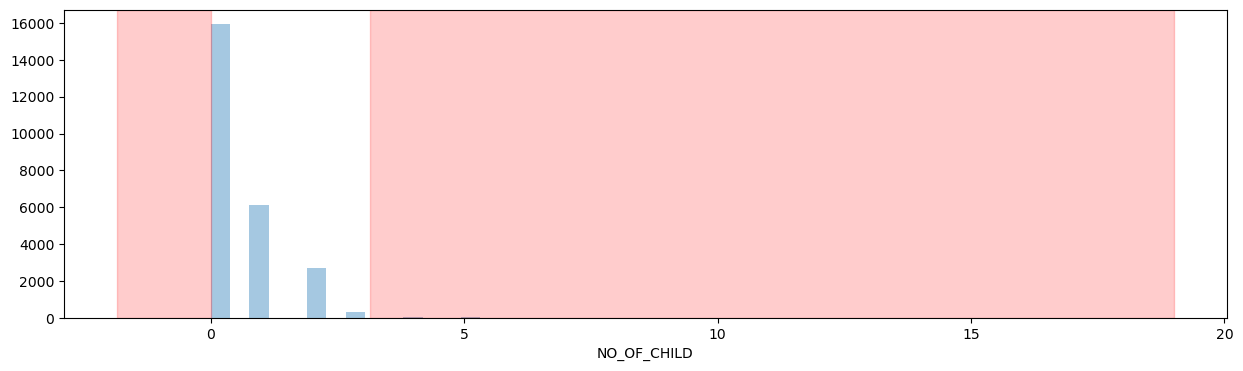

****************************************************************************************************
The lower bound value is -119508.61553198079
The upper bound value is 419118.6602895772
Total Number of outliers in column INCOME are 756


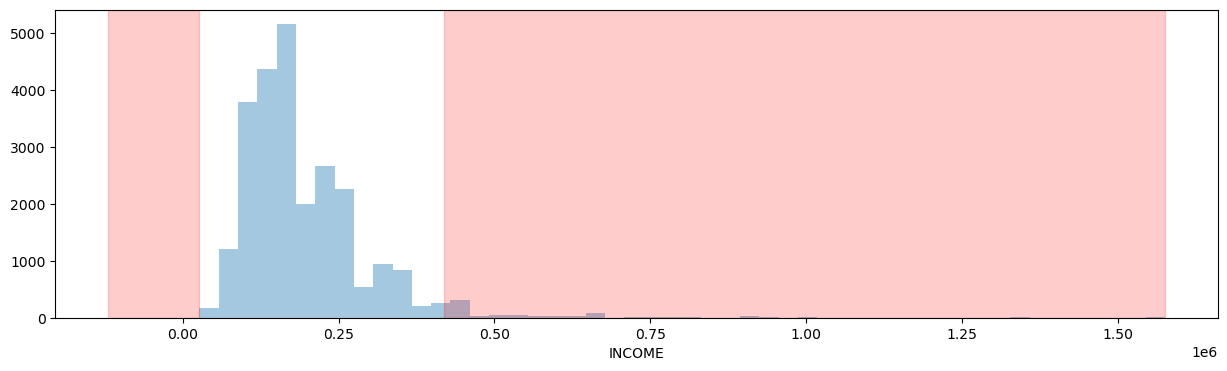

****************************************************************************************************
The lower bound value is -1.064041793203547
The upper bound value is 1.7840257283786076
Total Number of outliers in column WORK_PHONE are 0


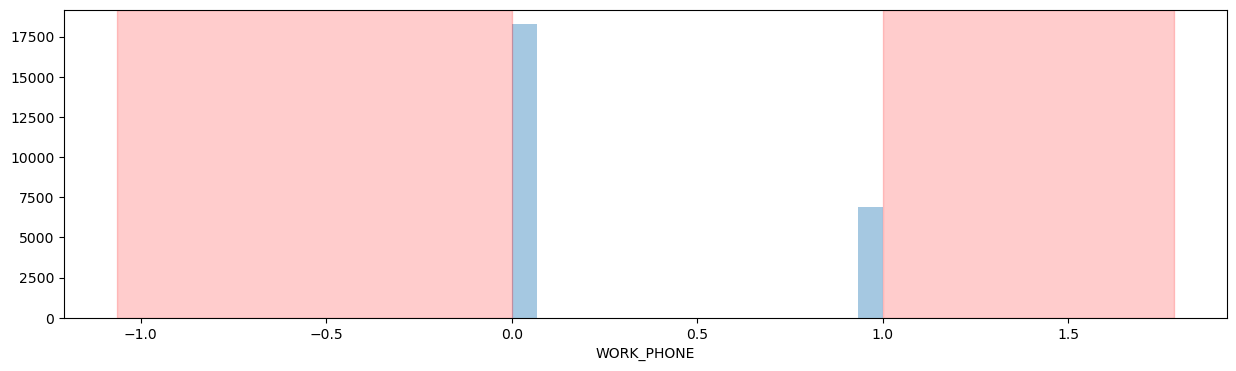

****************************************************************************************************
The lower bound value is -1.072259129694519
The upper bound value is 1.8196784421206145
Total Number of outliers in column PHONE are 0


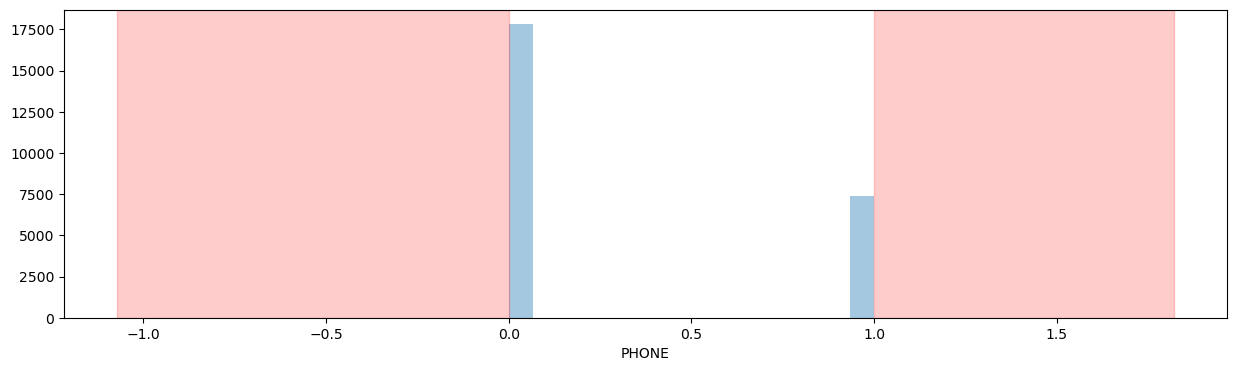

****************************************************************************************************
The lower bound value is -0.8015762365399791
The upper bound value is 1.2027958999488233
Total Number of outliers in column E_MAIL are 0


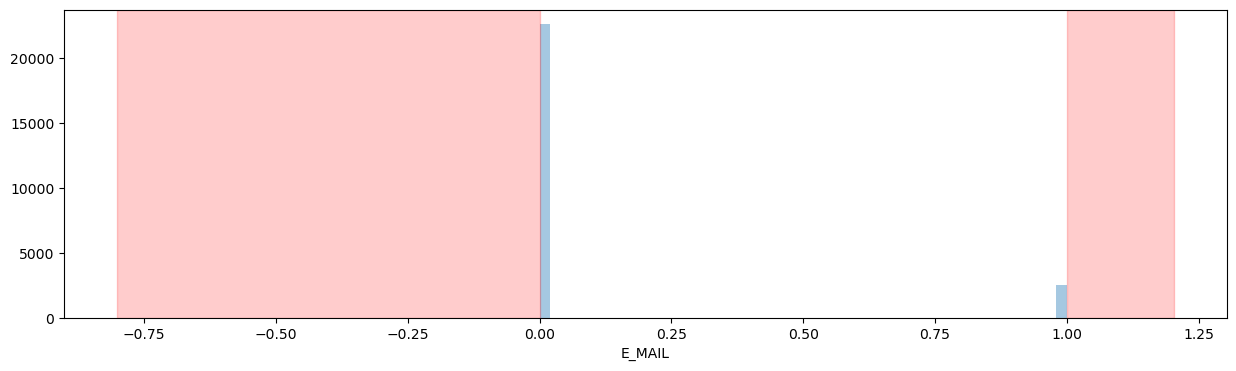

****************************************************************************************************
The lower bound value is -23.20084402359292
The upper bound value is 65.75391363141483
Total Number of outliers in column BEGIN_MONTH are 0


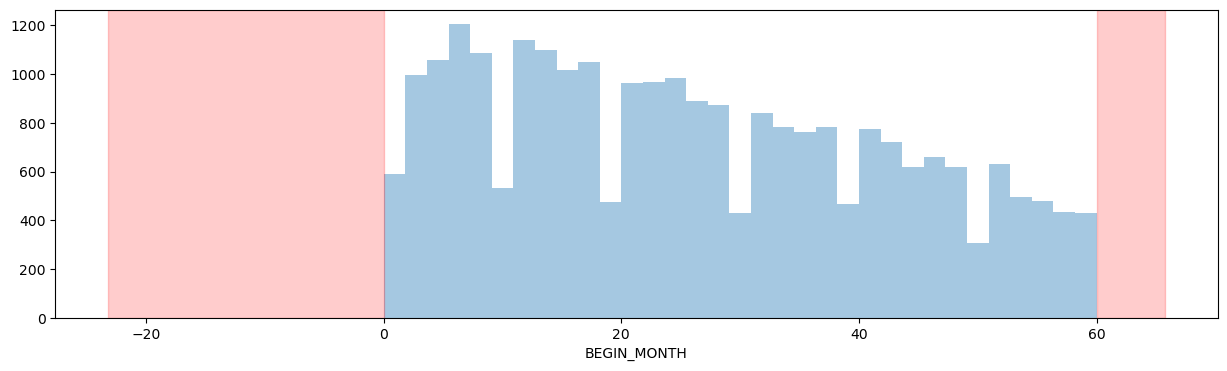

****************************************************************************************************
The lower bound value is -0.5485462078076075
The upper bound value is 3.789969078910481
Total Number of outliers in column FAMILY SIZE are 2962


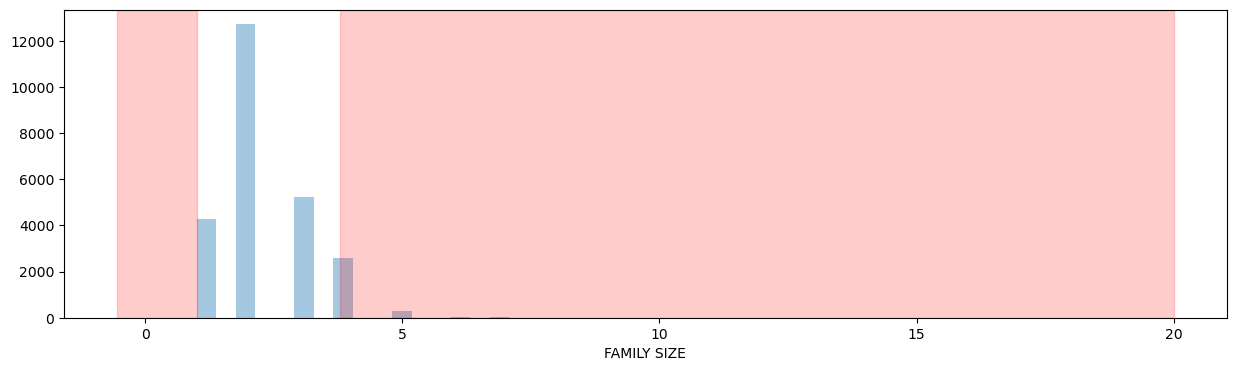

****************************************************************************************************
The lower bound value is 11.87519778219842
The upper bound value is 38.21863078806365
Total Number of outliers in column AGE are 13939


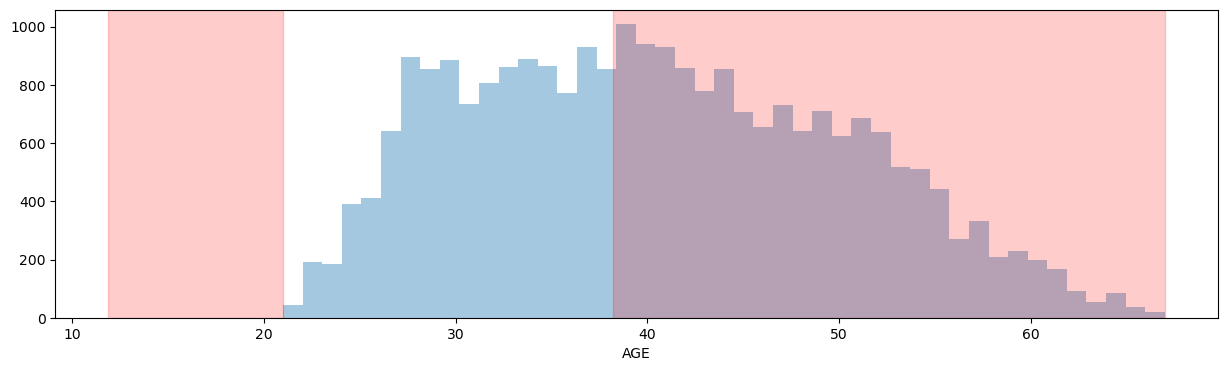

****************************************************************************************************
The lower bound value is -12.02835768270629
The upper bound value is 25.63225623377758
Total Number of outliers in column YEARS_EMPLOYED are 584


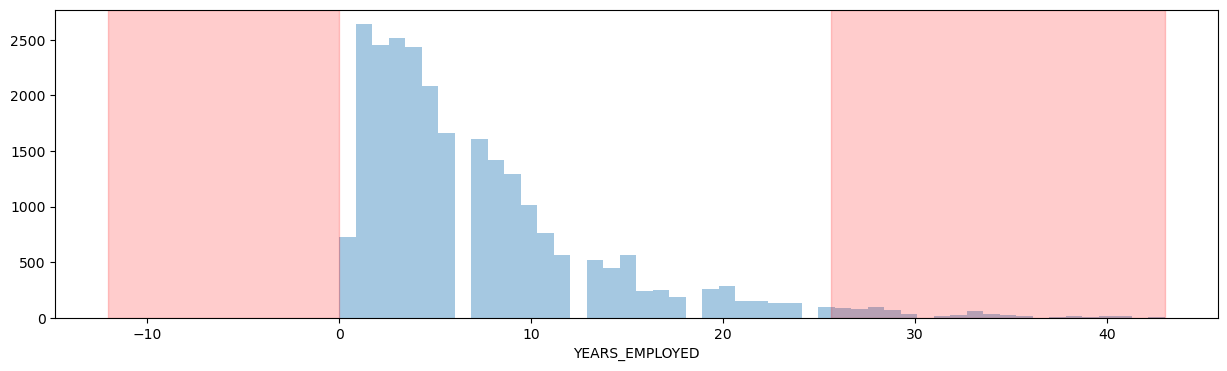

****************************************************************************************************


In [502]:
threshold = 3
columns_outliers = {}
for c in numeric_col:
    o, l, u = out_std(data, c, threshold)
    if o:
        columns_outliers[c]=[l,u]

##### Outliers detection, we have:
- 81 outliers for NO_OF_CHILD : we will not threat it since outlier is less
- 756 outliers for INCOME     : we will not threat it since outlier is less
- 2962 outliers for FAMILY SIZE 
- 13939 outliers for AGE
- 584 outliers for YEARS_EMPLOYED : we will not threat it since outlier is less

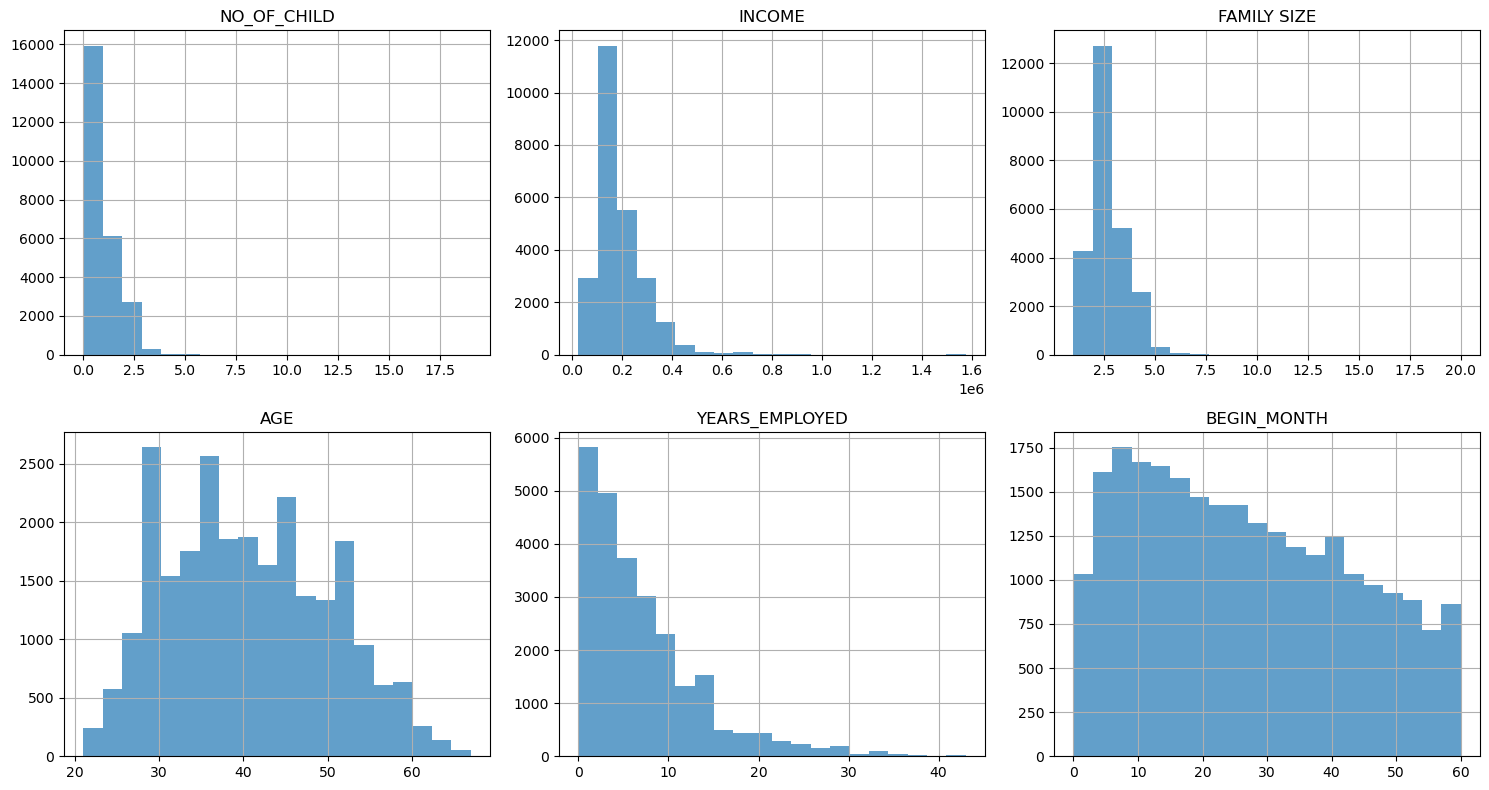

In [503]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['NO_OF_CHILD', 'INCOME', 'FAMILY SIZE', 'AGE', 'YEARS_EMPLOYED', 'BEGIN_MONTH']

# Plot histograms for each variable
for i, column in enumerate(columns_to_plot):
    data[column].hist(bins=20, ax=axes[i], alpha=0.7)
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### We will transform dataset using log

In [504]:
data['FAMILY SIZE'] = np.log(data['FAMILY SIZE'])
data['AGE'] = np.log(data['AGE'])

<Axes: >

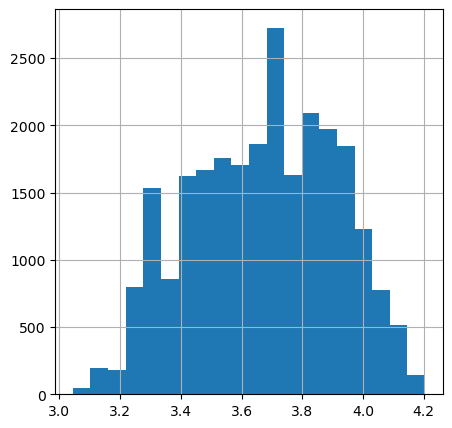

In [505]:
data['AGE'].hist(bins=20)

<Axes: >

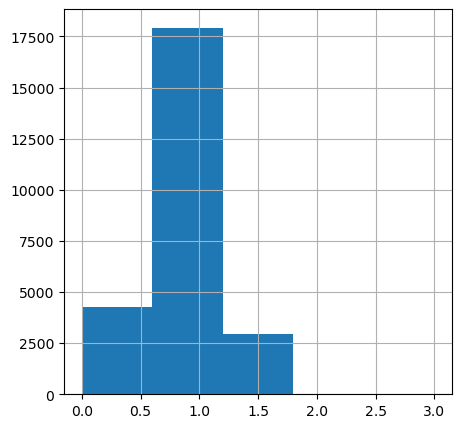

In [506]:
data['FAMILY SIZE'].hist(bins=5)

### Now, we get a distribution similar to normal distribution

## """""""Univariate ANALYSIS""""""""

### Numerical variables

## Target

In [507]:
data.TARGET.value_counts()

0    22037
1     3122
Name: TARGET, dtype: int64

In [508]:
data.TARGET.value_counts(normalize=True)

0   0.88
1   0.12
Name: TARGET, dtype: float64

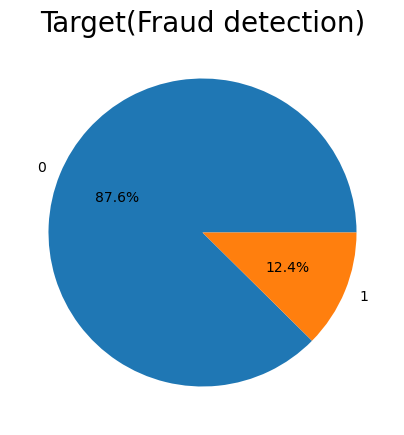

In [509]:
stat=data.TARGET.value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title("Target(Fraud detection)", y=1, fontdict={"fontsize": 20})
plt.show()

### 1. Target is imbalanced

## Visualization of numerical variable

In [510]:
print(numeric_col)

['NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'BEGIN_MONTH', 'FAMILY SIZE', 'AGE', 'YEARS_EMPLOYED']


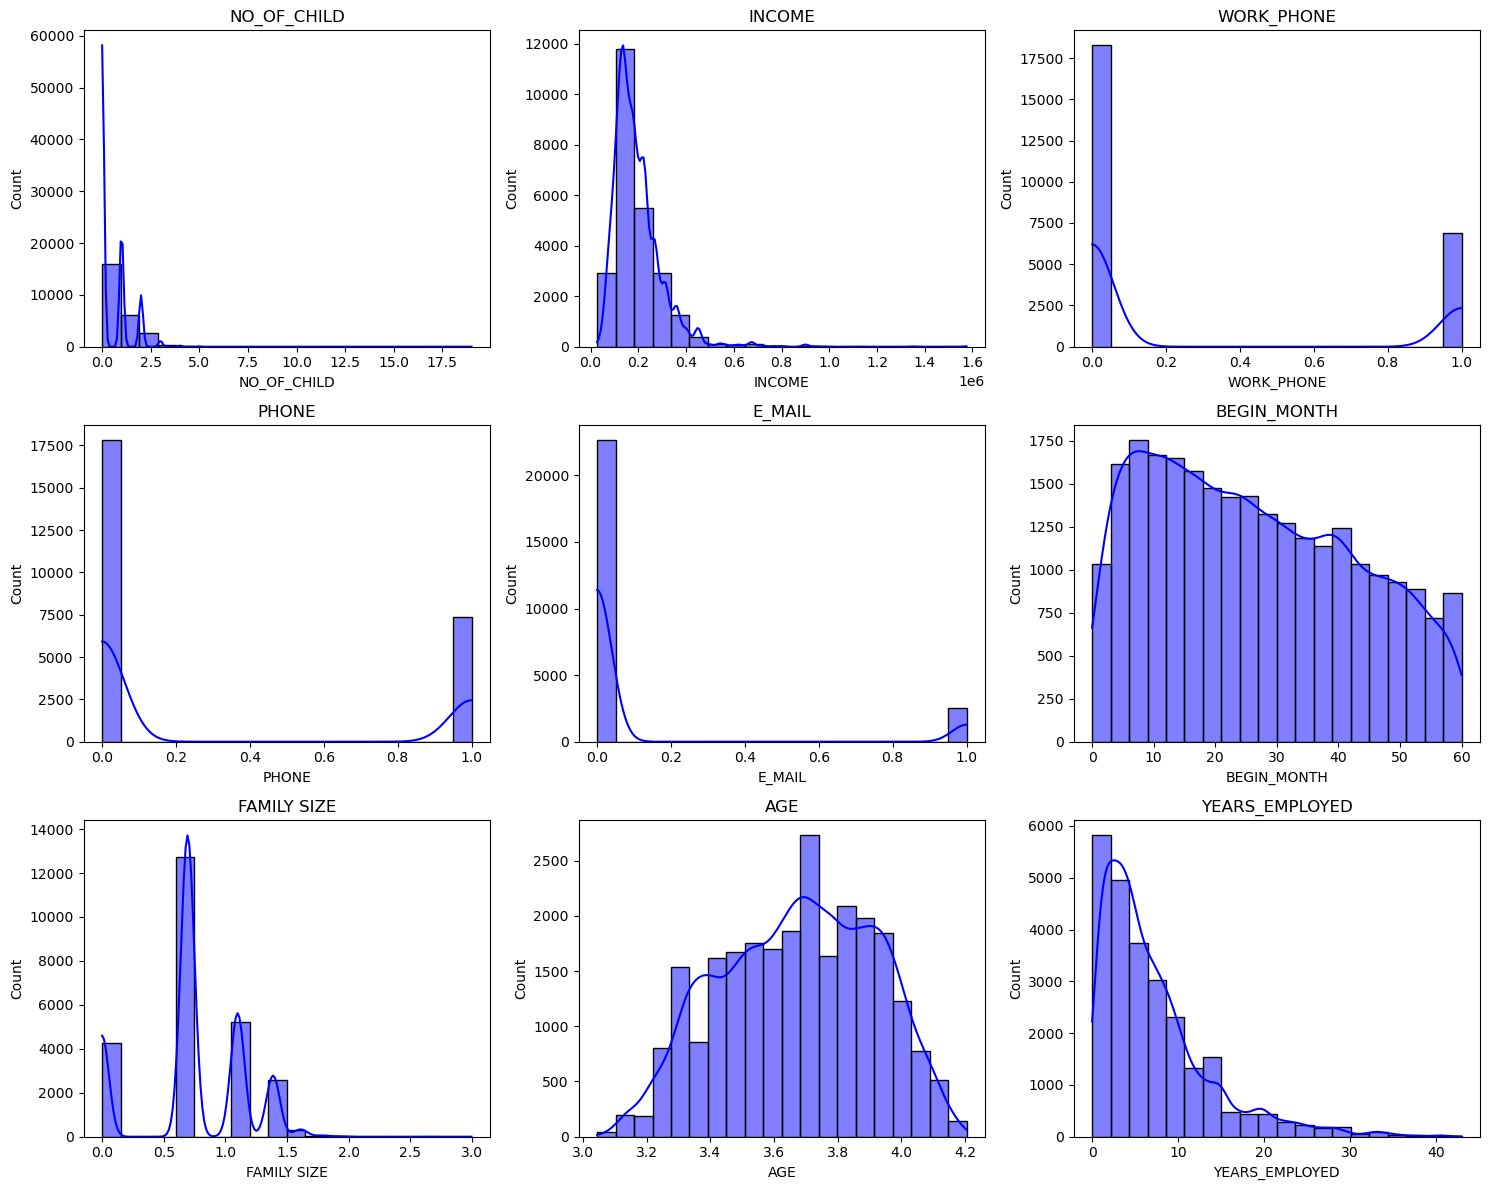

In [511]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Plot histplot for each numerical feature
for i, feature in enumerate(numeric_col):
    sns.histplot(data[feature], bins=20, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(feature)

# Remove any remaining empty subplots
for j in range(len(numeric_col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Categorical Variables

In [512]:
# find the level of each categorical variable
data_cat = data.select_dtypes(include=['object']).columns

for col in data_cat:
    print(f'level of {col}:')
    print(data[col].value_counts())
    print('*'*60)

level of GENDER:
F    15652
M     9507
Name: GENDER, dtype: int64
************************************************************
level of CAR:
N    14640
Y    10519
Name: CAR, dtype: int64
************************************************************
level of REALITY:
Y    16482
N     8677
Name: REALITY, dtype: int64
************************************************************
level of INCOME_TYPE:
Working                 15651
Commercial associate     7048
State servant            2437
Pensioner                  13
Student                    10
Name: INCOME_TYPE, dtype: int64
************************************************************
level of EDUCATION_TYPE:
Secondary / secondary special    16826
Higher education                  7134
Incomplete higher                  998
Lower secondary                    187
Academic degree                     14
Name: EDUCATION_TYPE, dtype: int64
************************************************************
level of FAMILY_TYPE:
Married             

### Visualization of Categorical variable

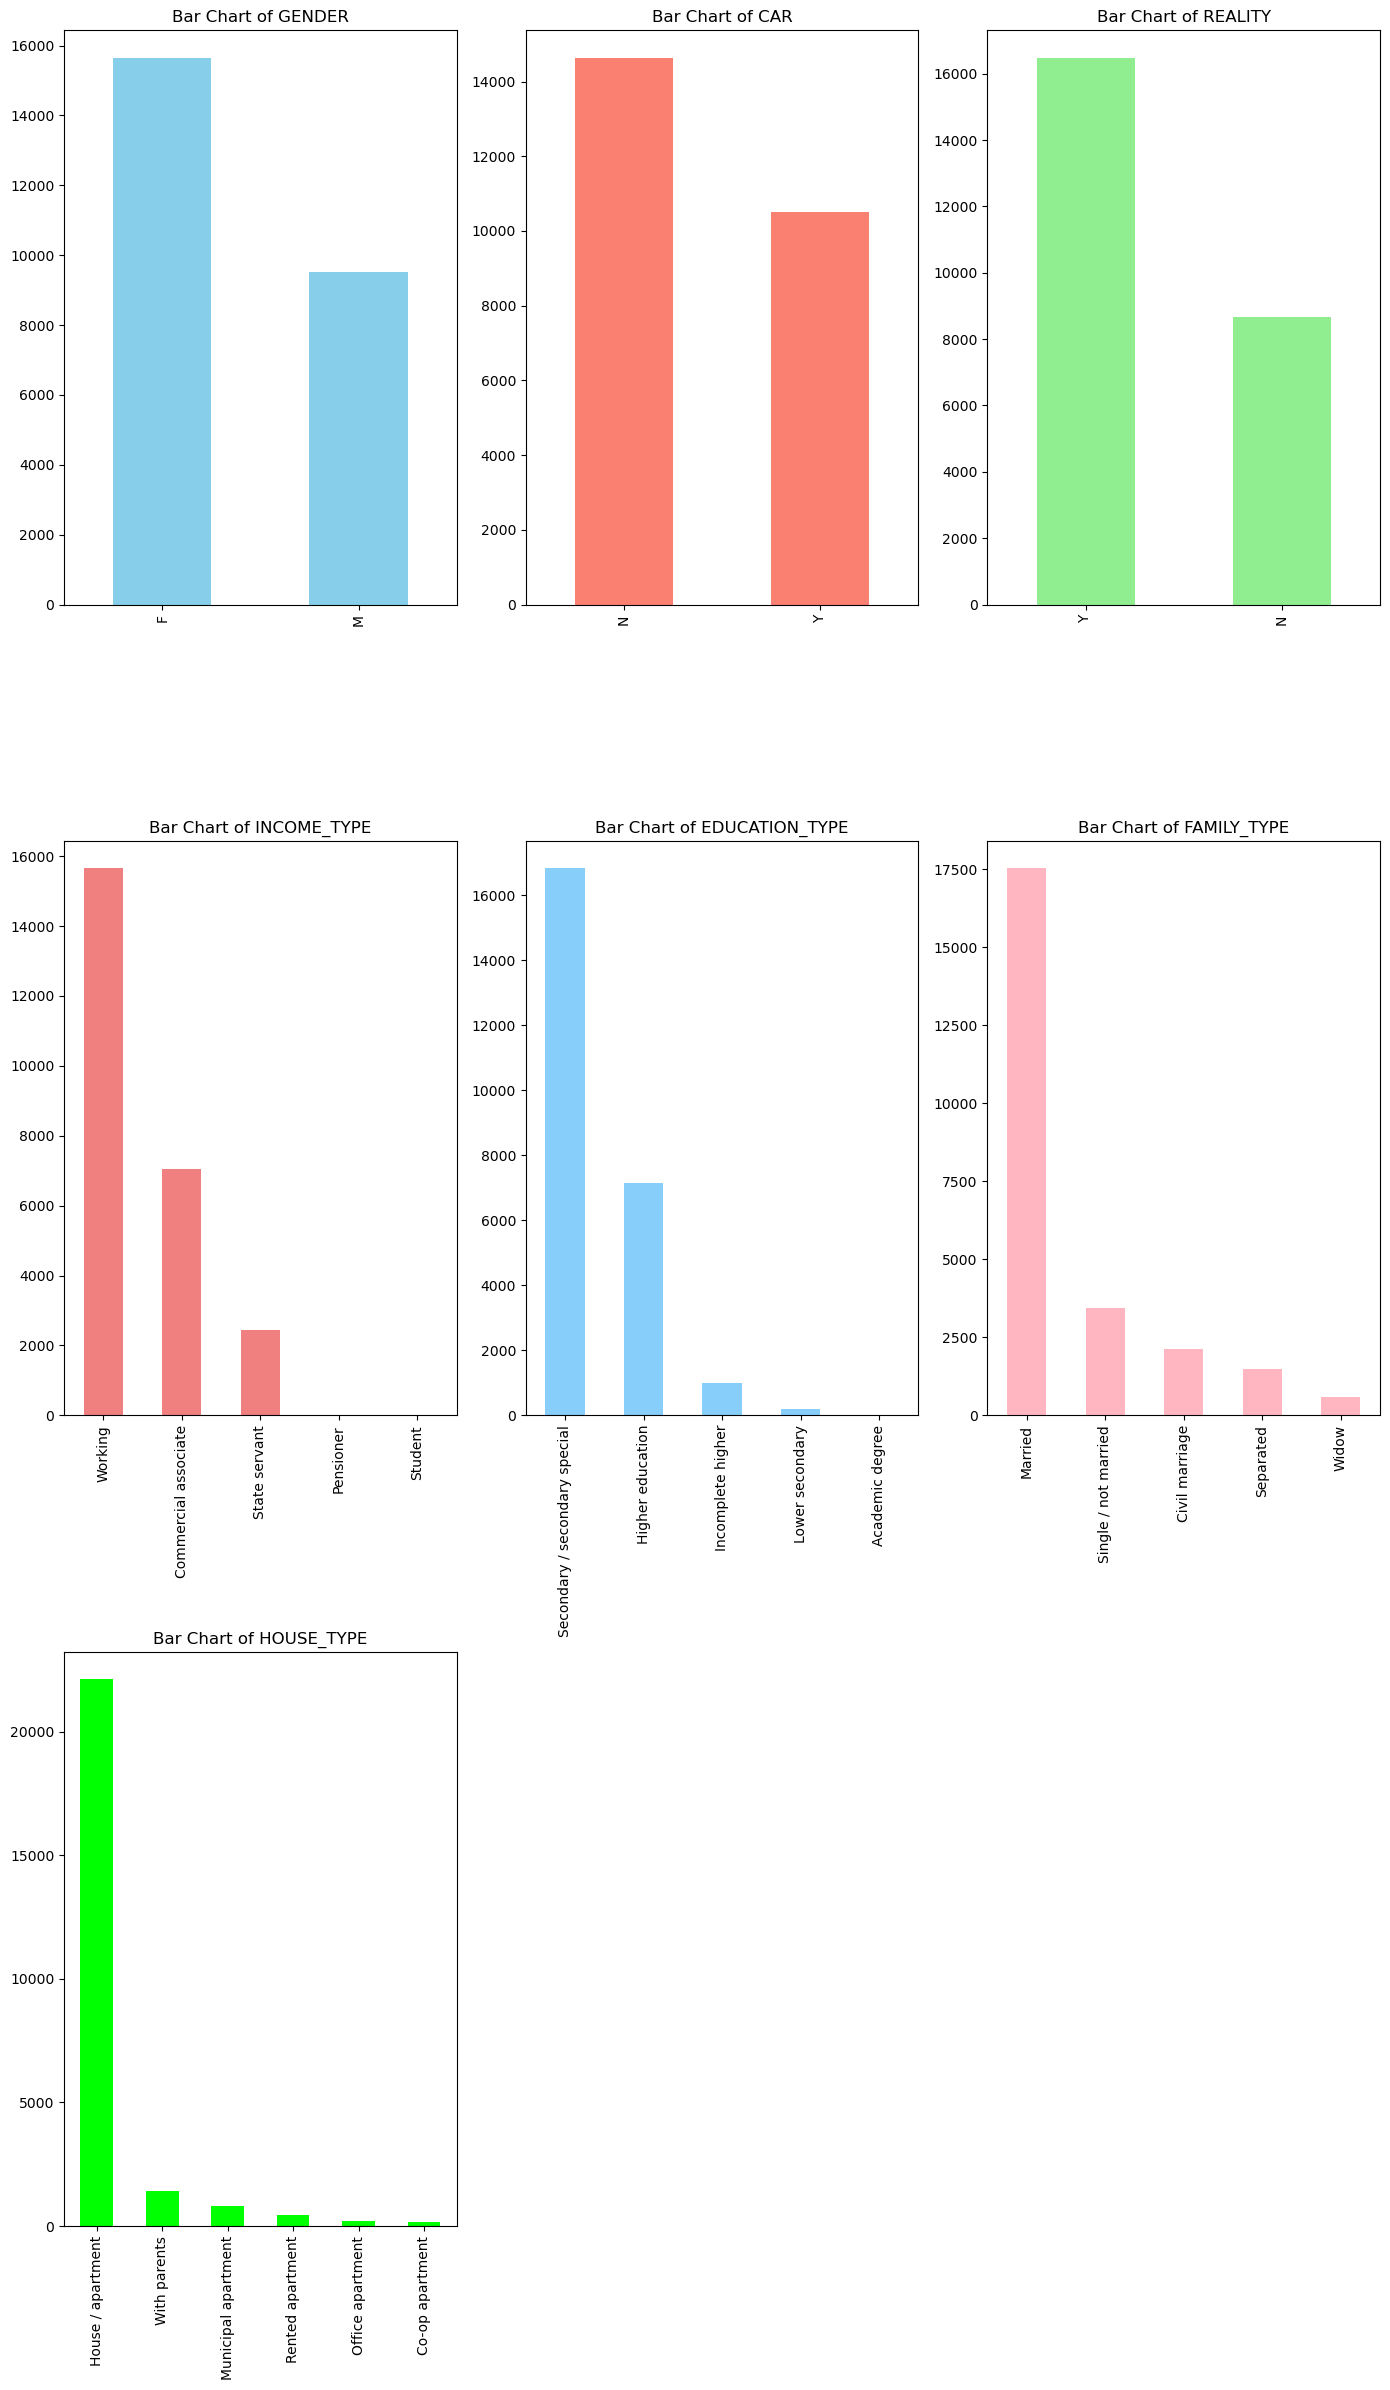

In [513]:
# The code below creates plot with bar charts for all categorical columns with less than 25 levels
import math

categorical = data_cat.copy()

# number of columns in the sub plot
n = 3

plt.figure(figsize=[14, 8 * math.ceil(len(categorical) / n)])

# Define a list of colors
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink','lime' ]

for i in range(len(categorical)):
    plt.subplot(math.ceil(len(categorical) / n), n, i + 1)
    data[categorical[i]].value_counts().plot(kind='bar', color=colors[i % len(colors)])
    plt.title(f'Bar Chart of {categorical[i]}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Bivariate analysis

### Categorical - Categorical

#### Cramer's V

We will Cramer's V to show the association between the variable since all categorical variable are nominal. It's based on the Chi-Squared statistic and is designed to provide a measure of association that takes values between 0 and 1

#### Interpretation
- value of 0:Indicates no association between the two nominal variables
- value of 1: Indicates a perfect correlation between the two nominal variables
- value between 0 and 1 indicate the strength of the association

#### Formula

The formula for Cramer’s V is:

$V = \sqrt{\frac{\chi^2}{n \times \min(k-1, r-1)} } $

Where:

- $ \chi^2 \$ is the chi-squared statistic from the test of independence.
- n  is the total number of cases (observations).
-  k  is the number of columns in the contingency table.
-  r  is the number of rows in the contingency table.

In [514]:
# import the library
from scipy.stats import chi2_contingency

In [515]:
data_categorical = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE','FAMILY_TYPE', 'HOUSE_TYPE']

In [516]:
def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt((stat/obs*mini))

In [517]:
rows=[]
for var1 in data[data_categorical]:
    col=[]
    for var2 in data[data_categorical]:
        cramers = cramers_V(data[var1],data[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V 
    rows.append(col)

cramers_result = np.array(rows)
data_cramers = pd.DataFrame(cramers_result, columns=data[data_categorical].columns, index=data[data_categorical].columns)

In [518]:
data_cramers

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
GENDER,1.00,0.34,0.04,0.09,0.05,0.14,0.07
CAR,0.34,1.00,0.00,0.05,0.08,0.15,0.04
REALITY,0.04,0.00,1.00,0.04,0.04,0.03,0.20
INCOME_TYPE,0.09,0.05,0.04,4.00,0.29,0.14,0.11
EDUCATION_TYPE,0.05,0.08,0.04,0.29,4.00,0.17,0.24
FAMILY_TYPE,0.14,0.15,0.03,0.14,0.17,4.00,0.25
HOUSE_TYPE,0.07,0.04,0.20,0.11,0.24,0.25,5.00


<Axes: >

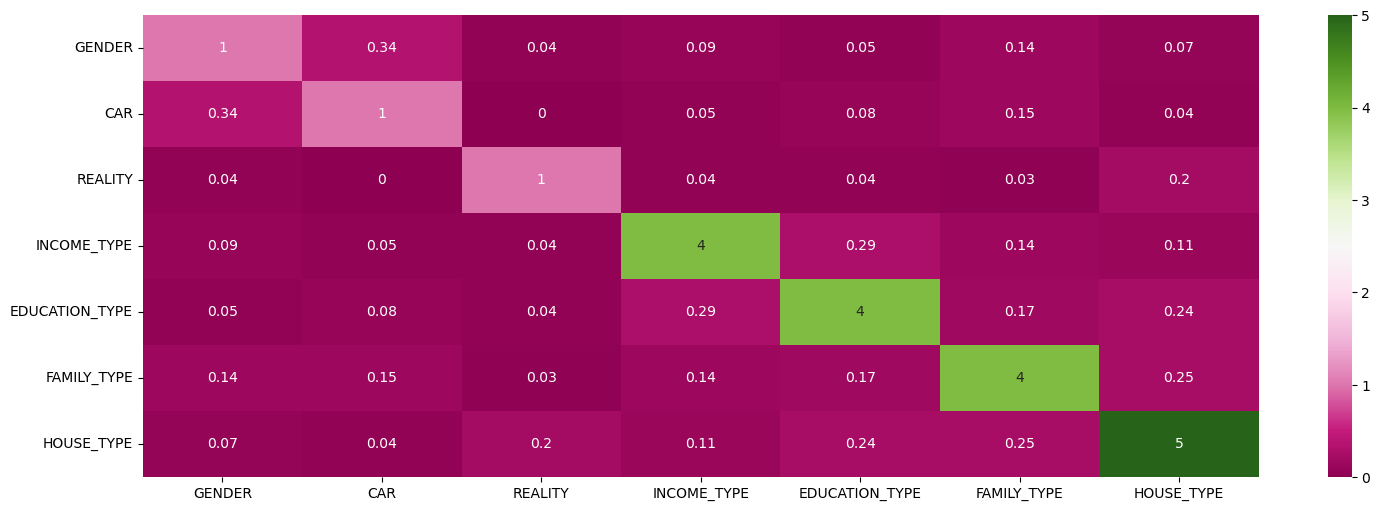

In [519]:
plt.figure(figsize=(18,6))
sns.heatmap(data_cramers, cmap="PiYG", annot=True)

## Continuous (TARGET) - Categorical

### Hypothesis with categorical variables

- There is a statistically significant association between ‘Target’ and ‘gender’
- There is a statistically significant association between ‘Target’ and ‘car’
- There is a statistically significant association between ‘Target’ and ‘reality’
- There is a statistically significant association between ‘Target’ and ‘income_type’
- There is a statistically significant association between ‘Target’ and ‘Education_type’
- There is a statistically significant association between ‘Target’ and ‘Family_type’
- There is a statistically significant association between ‘Target’ and ‘House_type’

### Chi-squared test of independancy

In [520]:
from scipy.stats import chi2_contingency

# We define a general function to test the relationship between 2 variable using chi-square test
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data[c1],data[c2],margins = False))# make sure margins = False
    print("Actual values:\n")
    print(pd.crosstab(data[c1],data[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<50 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistically significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude\
        there is a a statistically significant relationship between {c1} and {c2}")        

#### Target vs Gender

H0: There is no statistical significant relationship between 'Target' and 'Gender'<br>
Ha: There is  statistical significant relationship between 'Target' and 'Gender'

In [521]:
chi_square('TARGET','GENDER')

Actual values:

GENDER      F     M
TARGET             
0       13765  8272
1        1887  1235
Expected values: 

[[13709.73107039  8327.26892961]
 [ 1942.26892961  1179.73107039]]

Chi-square is : 4.666055802775943 

p_value is : 0.030764502784784157 

degree of freedom is :1

There is statistically significant correlation between TARGET and GENDER at 0.05 significant level


### There is a statistical significant association between Target and Gender

### Visualization 

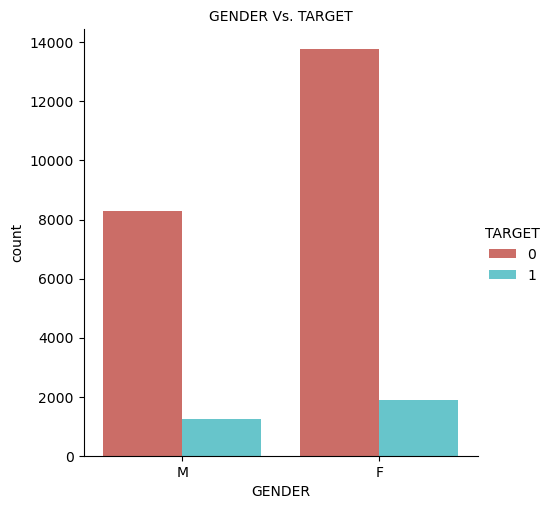

In [522]:
sns.catplot(x="GENDER", kind="count",hue = 'TARGET', palette='hls', data=data)
plt.title("GENDER Vs. TARGET", y=1, fontdict={"fontsize":10})
plt.show()

**Insight:** Most Credit card frauds are detected among Female.

### Target vs Income_type

In [523]:
chi_square('TARGET','INCOME_TYPE')

Actual values:

INCOME_TYPE  Commercial associate  Pensioner  State servant  Student  Working
TARGET                                                                       
0                            6164          0           2135        2    13736
1                             884         13            302        8     1915
Expected values: 

[[6.17340816e+03 1.13868198e+01 2.13459076e+03 8.75909217e+00
  1.37088552e+04]
 [8.74591836e+02 1.61318017e+00 3.02409237e+02 1.24090783e+00
  1.94214484e+03]]

Chi-square is : 134.34314520535375 

p_value is : 4.58521801915685e-28 

degree of freedom is :4

********************************************
******************************************** 


### Since P-value is less than 0.05, Then there is statistical significant association between Target and Income_type

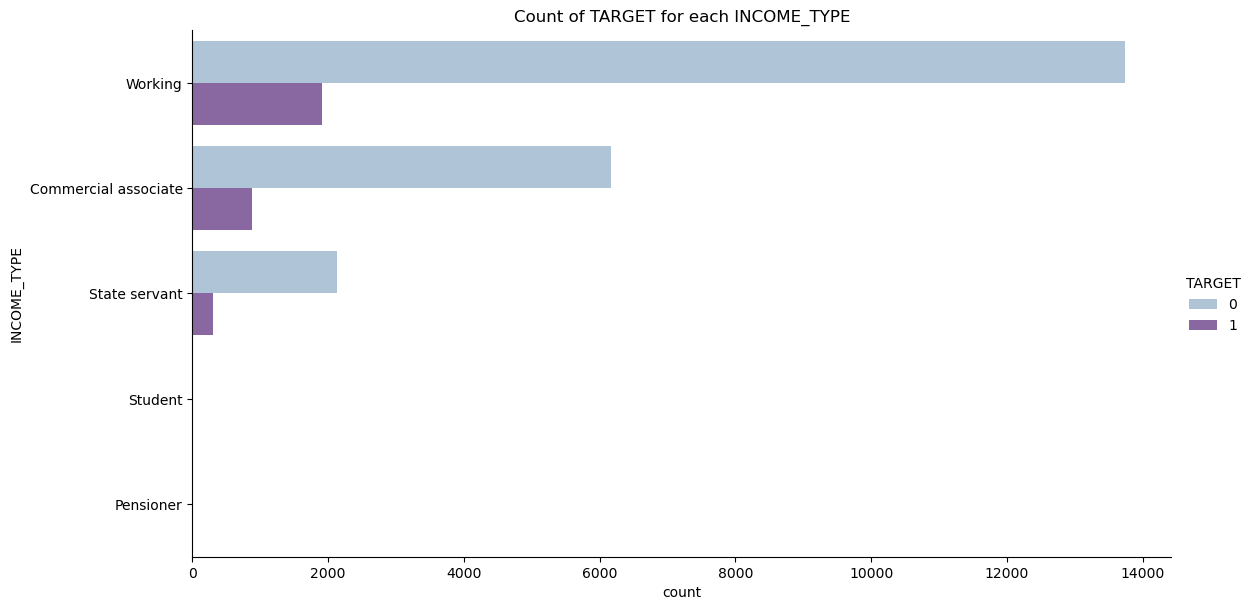

In [524]:
sns.catplot(y="INCOME_TYPE", kind="count", hue='TARGET', palette='BuPu', data=data, height=6, aspect=2, orient='horizontal')
plt.title("Count of TARGET for each INCOME_TYPE", fontdict={"fontsize": 12})
plt.show()

**Insight:** Most Credit card fraud is detected among working person

### Target Vs Family_type

In [525]:
chi_square('TARGET','FAMILY_TYPE')

Actual values:

FAMILY_TYPE  Civil marriage  Married  Separated  Single / not married  Widow
TARGET                                                                      
0                      1889    15290       1307                  3041    510
1                       244     2237        160                   411     70
Expected values: 

[[ 1868.31436067 15352.06085298  1284.95882189  3023.63861839
    508.02734608]
 [  264.68563933  2174.93914702   182.04117811   428.36138161
     71.97265392]]

Chi-square is : 7.779249559567113 

p_value is : 0.10000758844816876 

degree of freedom is :4

There is no correlation between the two variables( we don't have enough evidence to conclude        there is a a statistically significant relationship between TARGET and FAMILY_TYPE


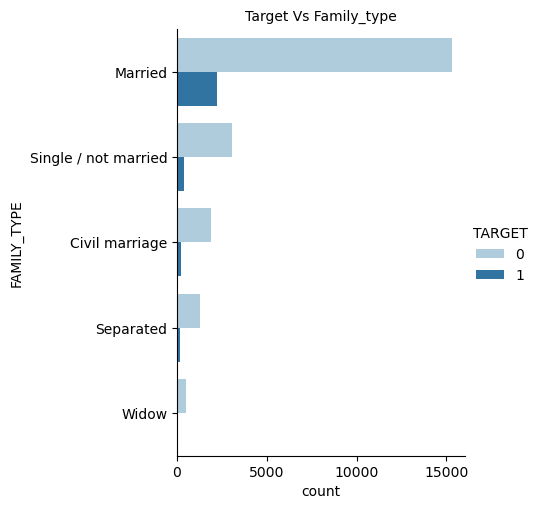

In [526]:
sns.catplot(y="FAMILY_TYPE", kind="count",hue = 'TARGET', palette='Paired', data=data)
plt.title("Target Vs Family_type", y=1, fontdict={"fontsize": 10})
plt.show()

**Insight:** Most Credit card fraud is detected among married

### Target Vs Reality

In [527]:
chi_square('TARGET','REALITY')

Actual values:

REALITY     N      Y
TARGET              
0        7546  14491
1        1131   1991
Expected values: 

[[ 7600.26427918 14436.73572082]
 [ 1076.73572082  2045.26427918]]

Chi-square is : 4.678459808843767 

p_value is : 0.030543121025288965 

degree of freedom is :1

There is statistically significant correlation between TARGET and REALITY at 0.05 significant level


### Since P-value is less than 0.05, Then there is statistical significant association between Target and Reality

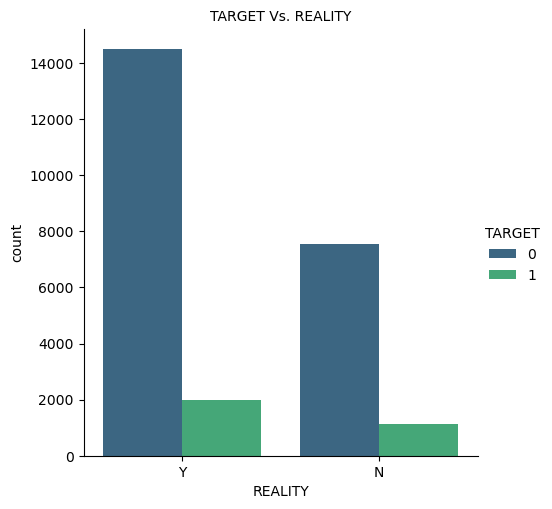

In [528]:
sns.catplot(x="REALITY", kind="count",hue = 'TARGET', palette='viridis', data=data)
plt.title("TARGET Vs. REALITY", y=1, fontdict={"fontsize": 10})
plt.show()

**Insight:** Most credit card fraud are detected from person owns real estate

## Continuous vs Continuous

**we can analyse target as categorical since we have only 2 levels**

### Hypothesis with continuous variables

- There is a statistically significant association between ‘Target’ and ‘INCOME’
- There is a statistically significant association between ‘Target’ and ‘WORK_PHONE’
- There is a statistically significant association between ‘Target’ and ‘PHONE’
- There is a statistically significant association between ‘Target’ and ‘E_MAIL’
- There is a statistically significant association between ‘Target’ and ‘BEGIN_MONTH’
- There is a statistically significant association between ‘Target’ and ‘FAMILY SIZE’
- There is a statistically significant association between ‘Target’ and ‘AGE’
- There is a statistically significant association between ‘Target’ and ‘YEARS_EMPLOYED’

### Since Target has only two levels, I will run T-test after checking the assumptions

## Target Vs Income

In [529]:
# Summarization
data.groupby(['TARGET']).agg({'INCOME':'describe'})

INCOME                                                             \
          count      mean       std      min       25%       50%       75%   
TARGET                                                                       
0      22037.00 195716.65 103062.43 27000.00 135000.00 180000.00 225000.00   
1       3122.00 188574.57 116006.96 32400.00 135000.00 157500.00 225000.00   

                   
              max  
TARGET             
0      1575000.00  
1      1575000.00

## T-test

In [530]:
no_target = data[data['TARGET']==0]
target = data[data['TARGET']==1]
no_target.shape, target.shape

((22037, 18), (3122, 18))

In [531]:
a = no_target['INCOME']
b = target['INCOME']

In [532]:
from scipy import stats
stats.levene(a, b)

LeveneResult(statistic=3.250057681060542, pvalue=0.0714329068172726)

### Since the p-value of levene's test is greater than 0.05, we can conclude than Income for target customers has the same variance with the income of no target customers

## We can use the same analysis to test the assumptions of others continuous variables with the TARGET variable

## We will look at Data correlation

In [533]:
data.corr()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
ID,1.00,0.03,-0.02,0.09,0.01,-0.06,0.02,-0.00,-0.04,-0.02,-0.13
NO_OF_CHILD,0.03,1.00,-0.02,-0.01,-0.02,-0.02,0.77,0.00,-0.23,-0.06,0.02
INCOME,-0.02,-0.02,1.00,-0.09,0.01,0.08,-0.03,0.02,0.06,0.02,-0.02
WORK_PHONE,0.09,-0.01,-0.09,1.00,0.37,-0.07,0.01,0.01,-0.04,0.01,-0.02
PHONE,0.01,-0.02,0.01,0.37,1.00,0.01,-0.00,0.02,0.03,0.04,-0.01
E_MAIL,-0.06,-0.02,0.08,-0.07,0.01,1.00,-0.00,-0.01,-0.07,-0.04,-0.02
FAMILY SIZE,0.02,0.77,-0.03,0.01,-0.00,-0.00,1.00,0.03,-0.15,-0.04,0.02
BEGIN_MONTH,-0.00,0.00,0.02,0.01,0.02,-0.01,0.03,1.00,0.10,0.09,0.02
AGE,-0.04,-0.23,0.06,-0.04,0.03,-0.07,-0.15,0.10,1.00,0.34,0.01
YEARS_EMPLOYED,-0.02,-0.06,0.02,0.01,0.04,-0.04,-0.04,0.09,0.34,1.00,0.01


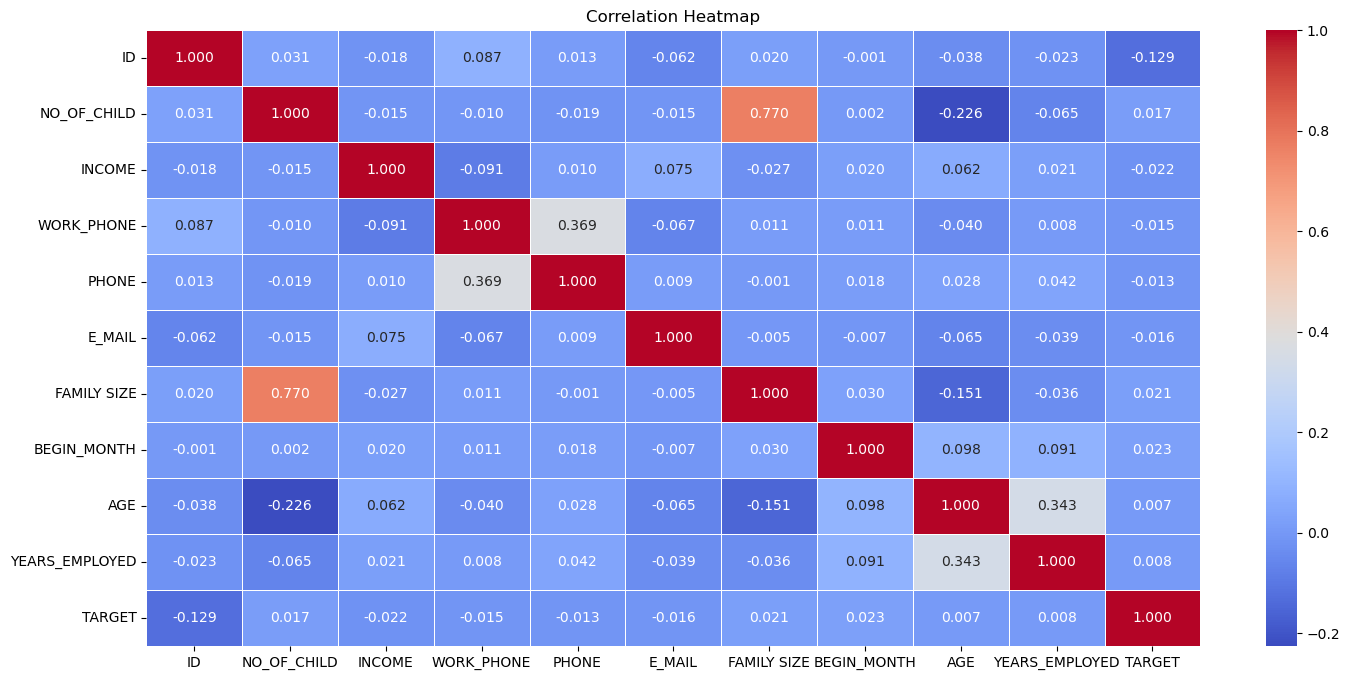

In [534]:
plt.figure(figsize=(17, 8))
# Plot the heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
# Add a title
plt.title('Correlation Heatmap')
# Show the plot
plt.show()

### Visualization

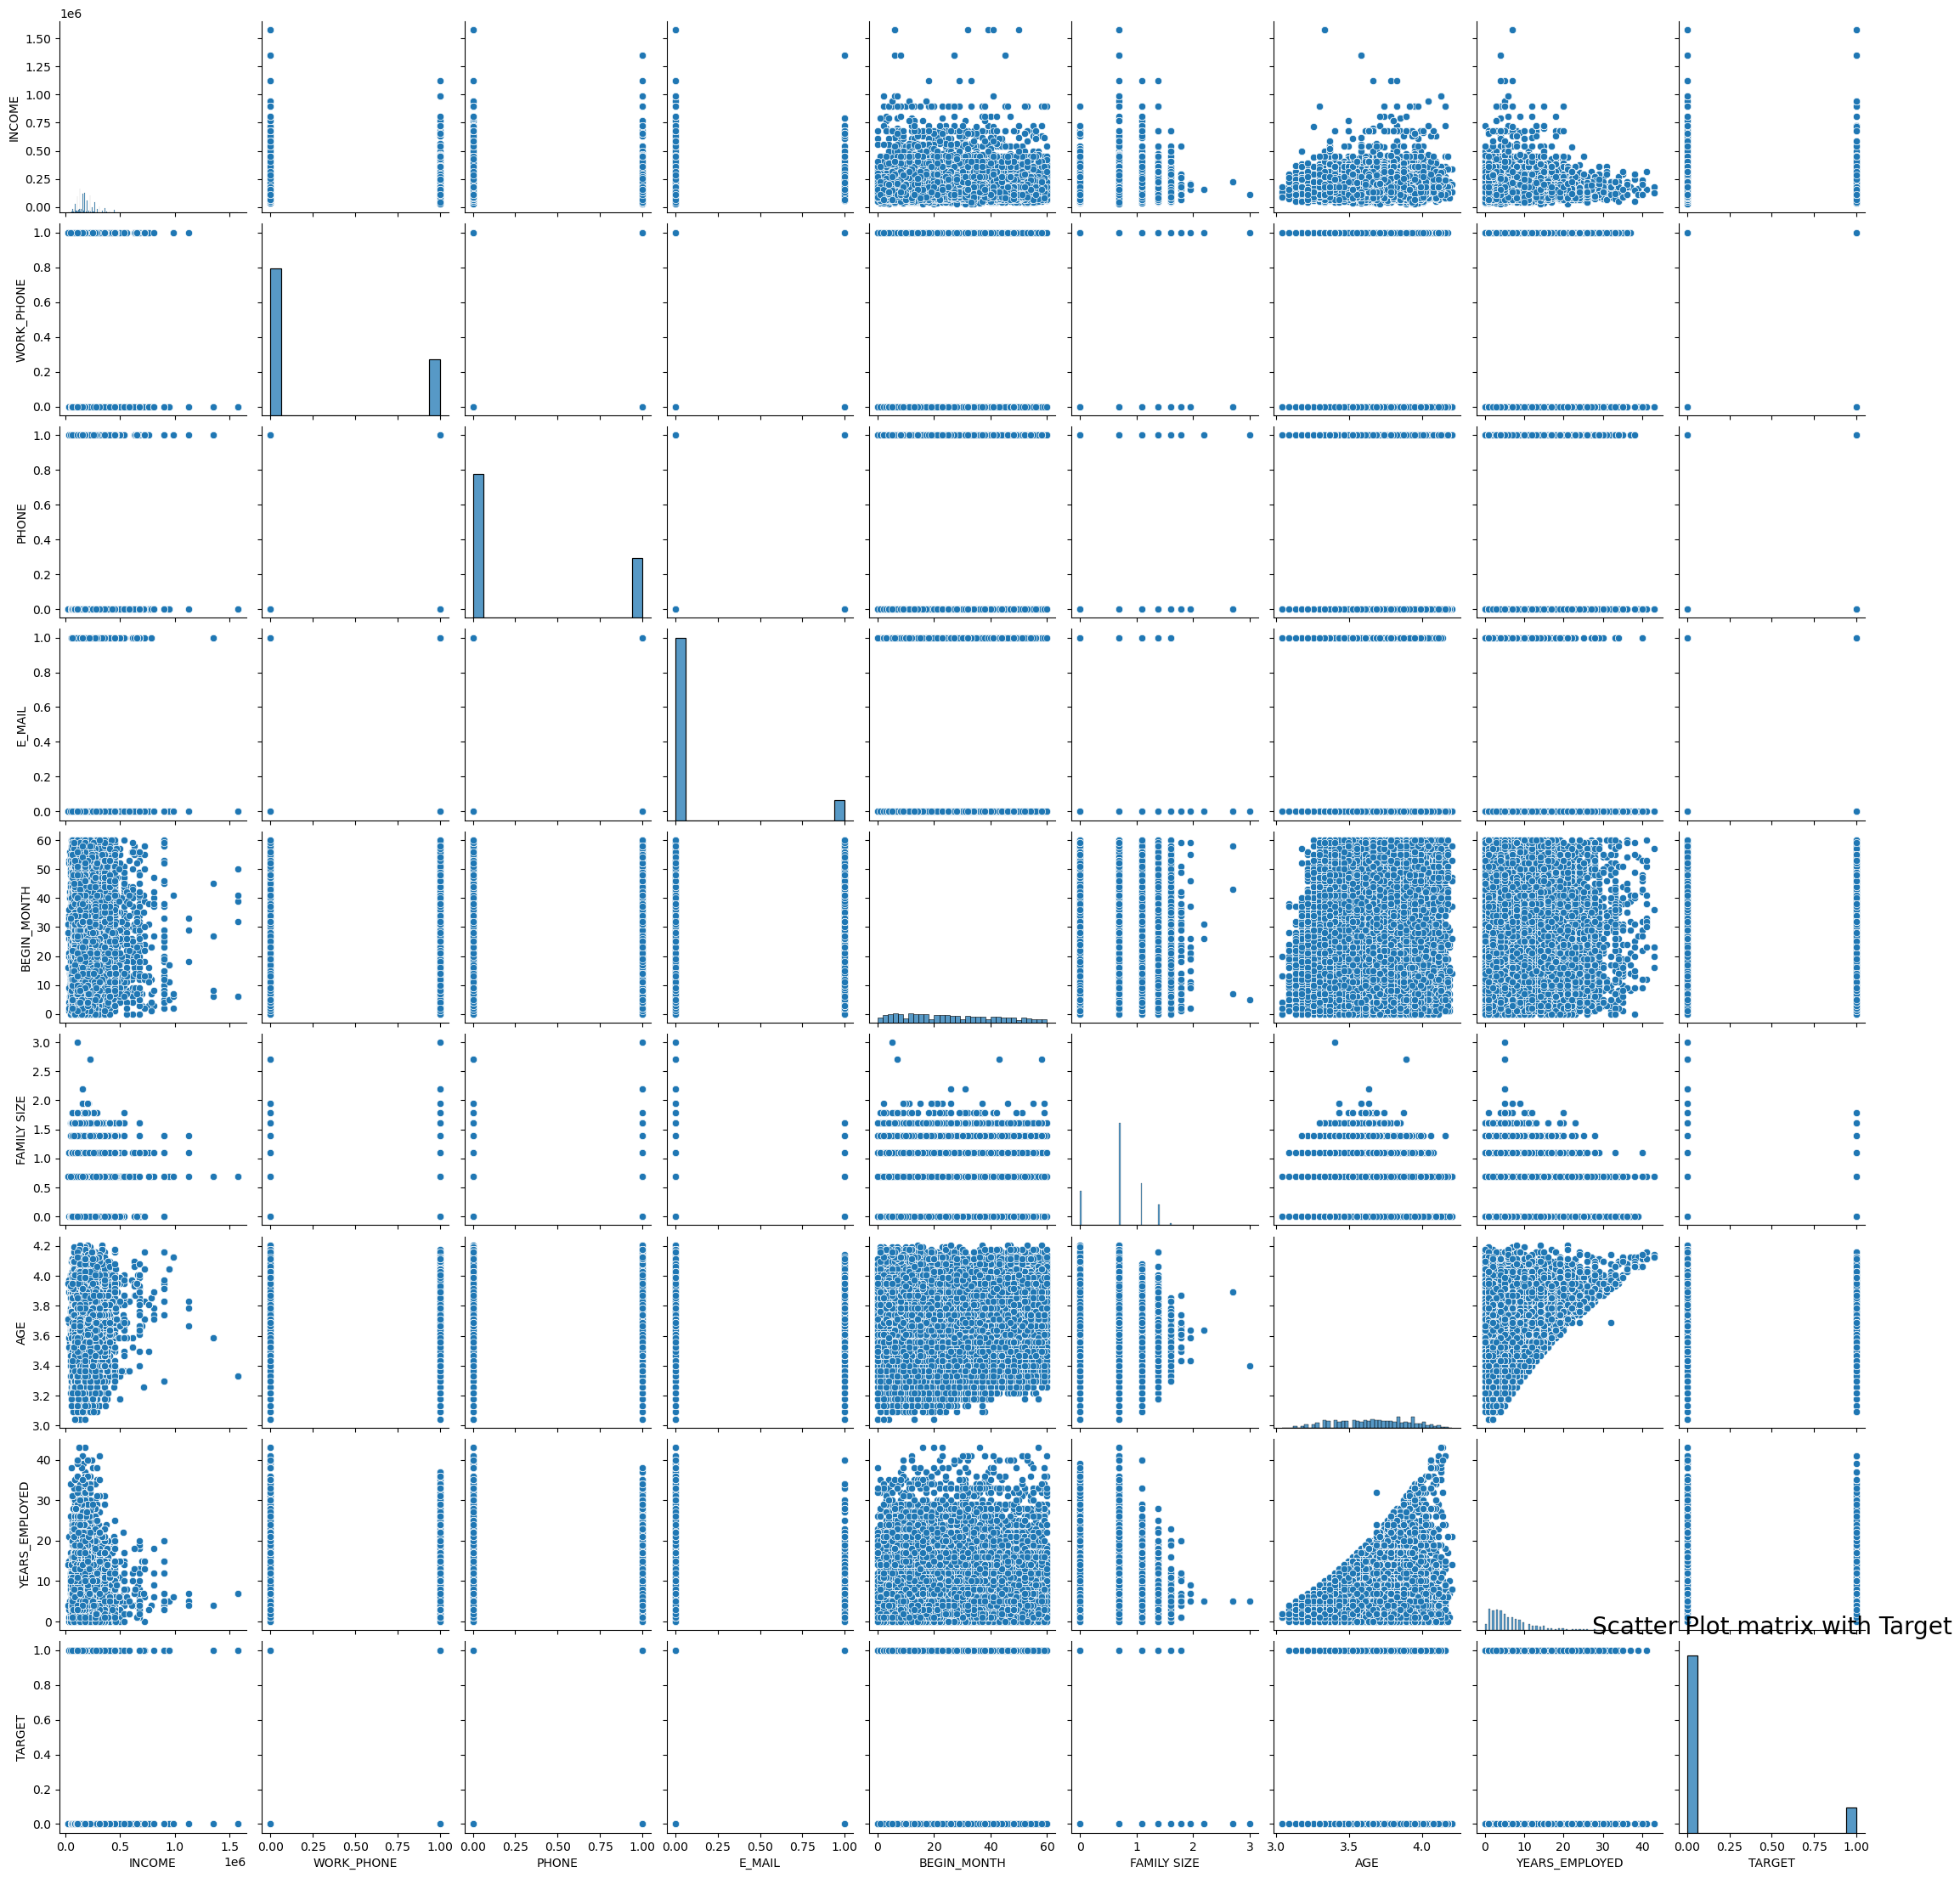

In [394]:
#plot the pair plot of all numwerical Variables.
sns.pairplot(data[["INCOME","WORK_PHONE","PHONE","E_MAIL","BEGIN_MONTH","FAMILY SIZE","AGE","YEARS_EMPLOYED","TARGET"]])
plt.title('Scatter Plot matrix with Target', fontsize=20)
plt.show()

**Insight:** Based on the scatter plot, we can see that, there are no association between Target and others variables(INCOME,WORK_PHONE,PHONE,E_MAIL,BEGIN_MONTH,FAMILY SIZE,AGE,YEARS_EMPLOYED)

## FEATURE ENGINEERING

In [535]:
print(data_categorical)

['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']


In [536]:
# One-hot encoding for the Categorical columns
data_encoded = pd.get_dummies(data, columns=['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE'], drop_first=True)

In [537]:
# Display the first 10 rows
data_encoded.head(10)

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,...,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,5008806,0,112500.00,0,0,0.00,0.69,29,4.08,3.00,...,1,1,0,0,0,1,0,0,0,0
1,5008808,0,270000.00,0,1,1.00,0.00,4,3.95,8.00,...,1,0,0,1,0,1,0,0,0,0
2,5008809,0,270000.00,0,1,1.00,0.00,26,3.95,8.00,...,1,0,0,1,0,1,0,0,0,0
3,5008810,0,270000.00,0,1,1.00,0.00,26,3.95,8.00,...,1,0,0,1,0,1,0,0,0,0
4,5008811,0,270000.00,0,1,1.00,0.69,38,3.95,8.00,...,1,0,0,1,0,1,0,0,0,0
5,5008815,0,270000.00,1,1,1.00,0.69,5,3.83,2.00,...,0,1,0,0,0,1,0,0,0,0
6,5112956,0,270000.00,1,1,1.00,0.69,42,3.83,2.00,...,0,1,0,0,0,1,0,0,0,0
7,5008819,0,135000.00,0,0,0.00,0.69,17,3.89,3.00,...,1,1,0,0,0,1,0,0,0,0
8,5008820,0,135000.00,0,0,0.00,0.69,16,3.89,3.00,...,1,1,0,0,0,1,0,0,0,0
9,5008821,0,135000.00,0,0,0.00,0.69,8,3.89,3.00,...,1,1,0,0,0,1,0,0,0,0


In [538]:
data.shape, data_encoded.shape

((25159, 18), (25159, 31))

In [539]:
len(data_encoded.columns)

31

In [540]:
data_encoded.columns

Index(['ID', 'NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL',
       'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET',
       'GENDER_M', 'CAR_Y', 'REALITY_Y', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'INCOME_TYPE_Student',
       'INCOME_TYPE_Working', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher', 'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents'],
      dtype='object')

In [541]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25159 entries, 0 to 25315
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            25159 non-null  int64  
 1   NO_OF_CHILD                                   25159 non-null  int64  
 2   INCOME                                        25159 non-null  float64
 3   WORK_PHONE                                    25159 non-null  int64  
 4   PHONE                                         25159 non-null  int64  
 5   E_MAIL                                        25159 non-null  float64
 6   FAMILY SIZE                                   25159 non-null  float64
 7   BEGIN_MONTH                                   25159 non-null  int64  
 8   AGE                                           25159 non-null  float64
 9   YEARS_EMPLOYED                                25159 non-null 

In [542]:
# Define the Target and Predictor

X = data_encoded.drop(['TARGET'], axis=1)
y = data_encoded['TARGET']

In [543]:
X.shape, y.shape

((25159, 30), (25159,))

In [544]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25159 entries, 0 to 25315
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            25159 non-null  int64  
 1   NO_OF_CHILD                                   25159 non-null  int64  
 2   INCOME                                        25159 non-null  float64
 3   WORK_PHONE                                    25159 non-null  int64  
 4   PHONE                                         25159 non-null  int64  
 5   E_MAIL                                        25159 non-null  float64
 6   FAMILY SIZE                                   25159 non-null  float64
 7   BEGIN_MONTH                                   25159 non-null  int64  
 8   AGE                                           25159 non-null  float64
 9   YEARS_EMPLOYED                                25159 non-null 

## Splitting test and training set for modelling

In [545]:
from sklearn.model_selection import train_test_split

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [547]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20127, 30), (5032, 30), (20127,), (5032,))

In [548]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20127 entries, 14899 to 2748
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            20127 non-null  int64  
 1   NO_OF_CHILD                                   20127 non-null  int64  
 2   INCOME                                        20127 non-null  float64
 3   WORK_PHONE                                    20127 non-null  int64  
 4   PHONE                                         20127 non-null  int64  
 5   E_MAIL                                        20127 non-null  float64
 6   FAMILY SIZE                                   20127 non-null  float64
 7   BEGIN_MONTH                                   20127 non-null  int64  
 8   AGE                                           20127 non-null  float64
 9   YEARS_EMPLOYED                                20127 non-nu

In [549]:
X_train.columns

Index(['ID', 'NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL',
       'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'GENDER_M',
       'CAR_Y', 'REALITY_Y', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'INCOME_TYPE_Student',
       'INCOME_TYPE_Working', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher', 'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents'],
      dtype='object')

In [550]:
X_columns = ['ID', 'NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL',
       'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'GENDER_M',
       'CAR_Y', 'REALITY_Y', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'INCOME_TYPE_Student',
       'INCOME_TYPE_Working', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher', 'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents']

## Data Scalling

In [551]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [552]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [553]:
X_train.columns = list(X_columns)
X_test.columns = list(X_columns)

In [554]:
X_train.head()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,...,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0.30,-0.65,0.08,-0.62,-0.64,-0.33,-1.77,-1.28,0.65,-0.34,...,0.70,-1.52,4.01,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
1,-1.33,0.62,-1.21,1.63,-0.64,-0.33,0.84,-0.86,0.26,-0.34,...,0.70,0.66,-0.25,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
2,0.85,-0.65,-0.35,1.63,-0.64,-0.33,-0.13,1.03,1.83,-0.97,...,-1.43,0.66,-0.25,-0.40,-0.15,-2.70,-0.18,-0.09,-0.14,-0.25
3,-0.28,-0.65,-0.70,-0.62,-0.64,-0.33,-1.77,-1.41,1.76,-0.50,...,0.70,-1.52,-0.25,2.52,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
4,-0.96,0.62,-0.78,-0.62,-0.64,-0.33,0.84,0.30,-0.62,0.28,...,-1.43,0.66,-0.25,-0.40,-0.15,-2.70,-0.18,-0.09,-0.14,4.06


In [555]:
X_test.head()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,...,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1.53,-0.65,-0.57,1.63,1.57,-0.33,-0.13,0.78,-2.08,-0.19,...,0.70,0.66,-0.25,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
1,0.50,-0.65,-0.08,-0.62,-0.64,-0.33,-0.13,1.94,0.06,0.28,...,0.70,0.66,-0.25,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
2,-0.62,-0.65,-0.14,-0.62,-0.64,-0.33,-1.77,-0.62,0.82,2.47,...,0.70,-1.52,4.01,-0.40,-0.15,-2.70,5.47,-0.09,-0.14,-0.25
3,-0.28,-0.65,0.08,-0.62,1.57,-0.33,-0.13,0.72,1.08,4.03,...,0.70,0.66,-0.25,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25
4,-1.33,-0.65,-0.78,-0.62,-0.64,-0.33,-1.77,0.05,1.47,-0.03,...,0.70,-1.52,4.01,-0.40,-0.15,0.37,-0.18,-0.09,-0.14,-0.25


## """"""""""""""""""""""Modeling""""""""""""""""""""""

The problem can be identified as binary classification (whether there is credit card fraud or not).
Since we have an imbalanced dataset, accuracy can give false assumptions regarding the classifier's performance. We will use precision and recall which are combined into single score called the F-score. In this project, we will select the best score based on **F-SCORE.**

These are Machine learning algorithms we will use:<br>
- **Dummy Classifier**
- **Logistic Regression**
- **Decision tree**
- **Random Forest**
- **AdaBoost**

I will apply **Hyperparameter tuning** based on F-score with GridSearch and Cross-Validation, then based on F-Score, we will select the best 2 models

**Feature Selection** is done in this project by using Filter methods such as:

- **VIF** values.

In [556]:
# importing libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

### **We will create an infrastructure for the rest of code**

- name: name of the model<br>
- y_train: true value of y<br>
- X_train: features<br>
- model: model to be fit<br>
- folds:number of folds in cv<br>
- norm:L1 or L2<br>
- C: inverse of regularization strenght(must be a positive float)<br>
- class_weight: weight associated with classes

In [557]:
## Create an entry to store the data

def store_results(name, X_train,y_train,X_test,y_test,model,folds, norm, c, Class_weght='N/A'):
    #train the model
    model.fit(X_train,y_train)
    
    #predict on the data test dataset
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluation of the model
    
    train_accuracy_score = accuracy_score(y_train,y_pred_train)
    test_accuracy_score = accuracy_score(y_test, y_pred)
    train_f1_score = round(metrics.f1_score(y_train,y_pred_train),2)
    test_f1_score = round(metrics.f1_score(y_test, y_pred),2)
    classificationReport = classification_report(y_test, y_pred)
    print('classification_report:\n',classificationReport)
    print('*'*60)
    
    ## Compute and plot the confusion matrix
    
    confusionMatrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['TN','FP','FN','TP']
    group_percentages = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
    labels = [f'{v1}: {v2}\n\n{v3}' for v1, v2, v3 in zip(group_names,confusionMatrix.flatten(),group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusionMatrix, annot=labels, cmap='BuPu', fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel('predicted values', fontdict = {'size':14}, labelpad = 10)
    plt.ylabel('Actual values', fontdict = {'size':14}, labelpad = 10)
    plt.title('confusion Matrix', fontdict = {'size':18}, pad = 20)
    plt.show()
    print('_'*60)
    
    print('train f1 score:\n')
    print(round(metrics.f1_score(y_train,y_pred_train),2))
    print('_'*60)
    
    print('test f1 score:\n')
    print(round(metrics.f1_score(y_test, y_pred),2))
    print('_'*60)
    
     # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-curve')
    plt.xlabel('False Positive Rate(Positive Label)')
    plt.ylabel('True Positive Rate(Positive Label)')
    plt.legend(loc='lower right')
    plt.show()
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 4))
    plt.step(recall, precision, color='b', where='post', label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    
    
    # cross validation scores for the model
    
    auc = cross_val_score(model, X_train, y_train, cv=folds, n_jobs=-1, scoring = 'roc_auc').mean()
    Accuracy = cross_val_score(model, X_train, y_train, cv=folds, n_jobs=-1).mean()
    scores = cross_val_score(model, X_train, y_train, cv=folds, n_jobs=-1, scoring='f1')
    f1score = scores.mean()
    
    entry = {'Model': [name],
            'Regularization': [norm],
            'C': [c],
            'Class_Weight': [Class_weght],
            'AUC': [auc],
            'train_accuracy_score': [train_accuracy_score],
            'test_accuracy_score': [test_accuracy_score],
            'train_f1_score': [train_f1_score],
            'test_f1_score': [test_f1_score],
            'CrossVal_mean(Accuracy)': [Accuracy],
            'CrossVal_mean(F1_score)': [f1score],
            'Crossval1(f1)': [scores[0]],
            'Crossval1(f1)': [scores[1]],
            'Crossval1(f1)': [scores[2]],
            'Crossval1(f1)': [scores[3]],
            }
    result = pd.DataFrame(entry)
    return result

## """""""""""""""Dummy Classifier""""""""""""""""

classification_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      4396
           1       0.00      0.00      0.00       636

    accuracy                           0.87      5032
   macro avg       0.44      0.50      0.47      5032
weighted avg       0.76      0.87      0.81      5032

************************************************************


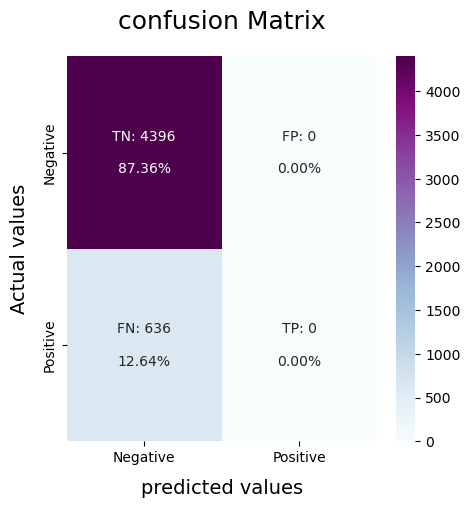

____________________________________________________________
train f1 score:

0.0
____________________________________________________________
test f1 score:

0.0
____________________________________________________________


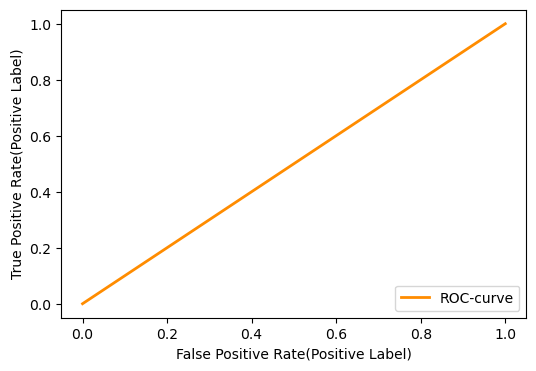

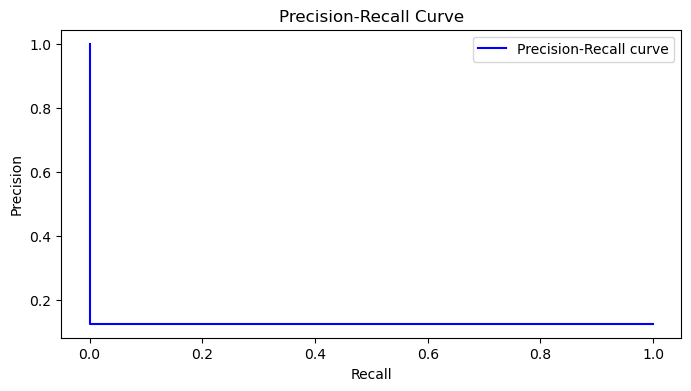

In [558]:
dummy_clf = DummyClassifier(strategy='most_frequent')
outcome = store_results("Dummy Classifier",X_train, y_train,X_test, y_test,dummy_clf , 5,"N/A", "N/A")
outcome 
Model_Comparison=outcome.copy()

Our model has 93% overall accuracy, but is it because it's predicting more the majority class. you can see f1_score for positive class (class 1.0) is equal to 0.00

## """""""""""""""Logistic Regression""""""""""""""""

### Logistic Regression With L2 Regularization (Ridge)

In [559]:
LR= LogisticRegression(solver='liblinear' ,random_state=1234)

classification_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      4396
           1       0.57      0.01      0.01       636

    accuracy                           0.87      5032
   macro avg       0.72      0.50      0.47      5032
weighted avg       0.84      0.87      0.82      5032

************************************************************


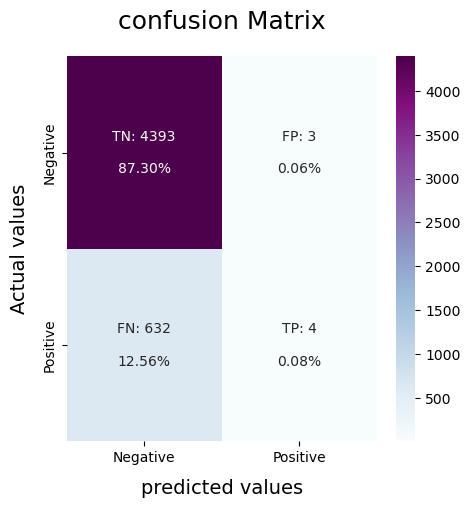

____________________________________________________________
train f1 score:

0.02
____________________________________________________________
test f1 score:

0.01
____________________________________________________________


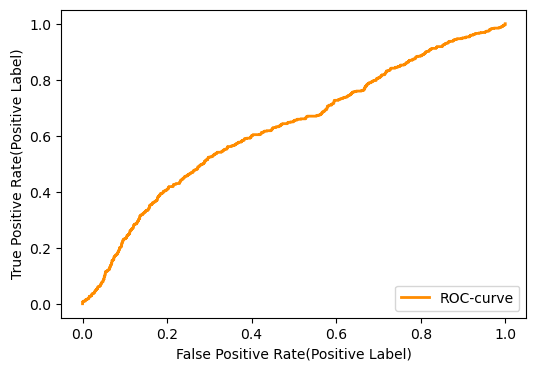

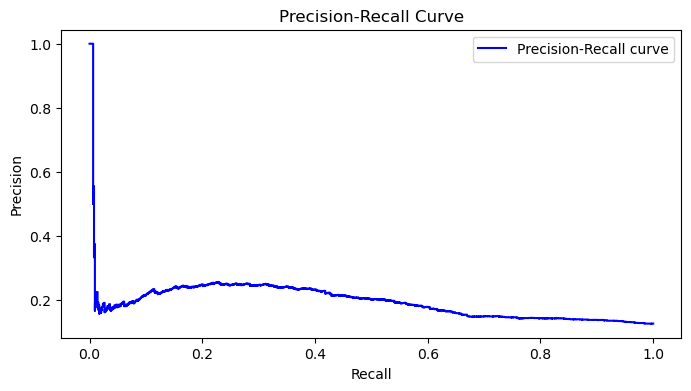

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02


In [560]:
outcome1 = store_results("Logistic Regression_L2",X_train, y_train,X_test, y_test, LR, 5,"L2", 1) 
Model_Comparison1 = Model_Comparison.append (outcome1)
Model_Comparison1

## Handel imbalanced classes   

In [561]:
LR_WB= LogisticRegression(solver='liblinear' ,class_weight='balanced',random_state=1234)

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.72      4396
           1       0.18      0.61      0.27       636

    accuracy                           0.59      5032
   macro avg       0.54      0.60      0.49      5032
weighted avg       0.82      0.59      0.66      5032

************************************************************


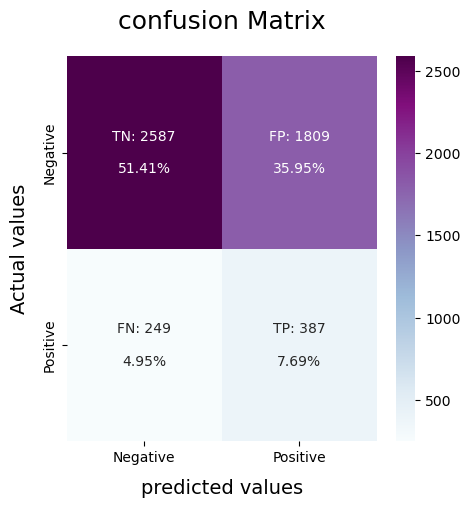

____________________________________________________________
train f1 score:

0.27
____________________________________________________________
test f1 score:

0.27
____________________________________________________________


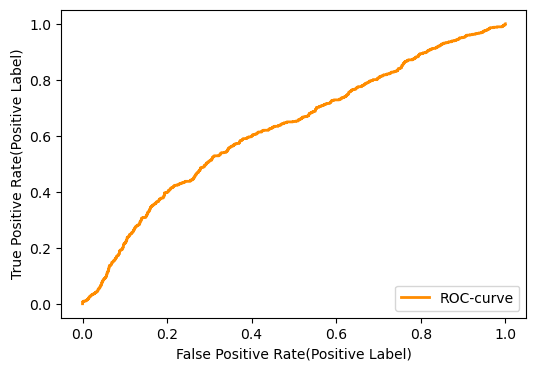

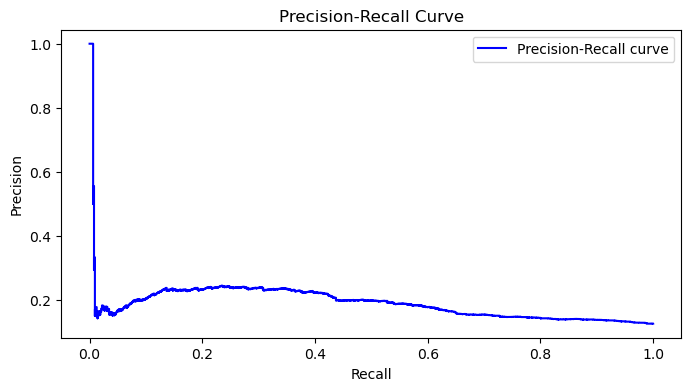

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26


In [562]:
outcome2 = store_results("Logistic Regression_L2_WB",X_train, y_train,X_test, y_test, LR_WB, 5,"L2", 1,"Balanced")
Model_Comparison2 = Model_Comparison1.append (outcome2)
Model_Comparison2

### Logistic Regression with Lasso Regularization (L1)

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71      4396
           1       0.18      0.61      0.27       636

    accuracy                           0.59      5032
   macro avg       0.54      0.60      0.49      5032
weighted avg       0.82      0.59      0.66      5032

************************************************************


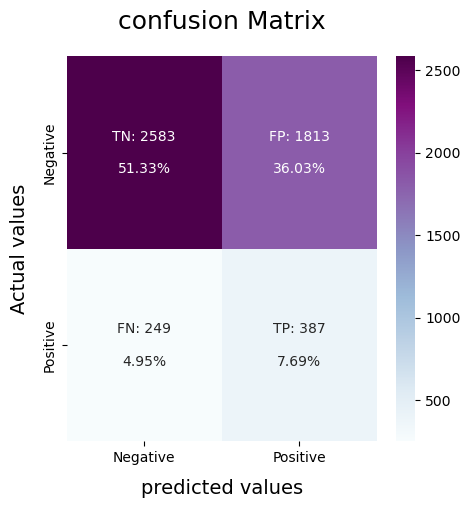

____________________________________________________________
train f1 score:

0.27
____________________________________________________________
test f1 score:

0.27
____________________________________________________________


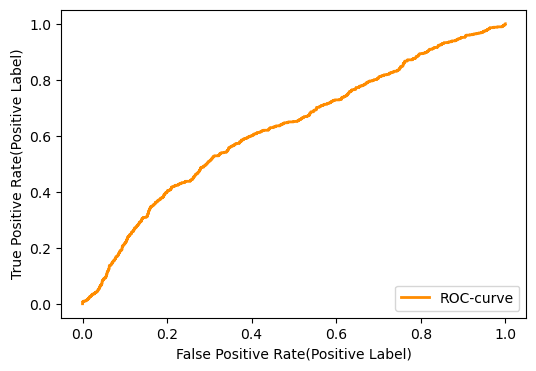

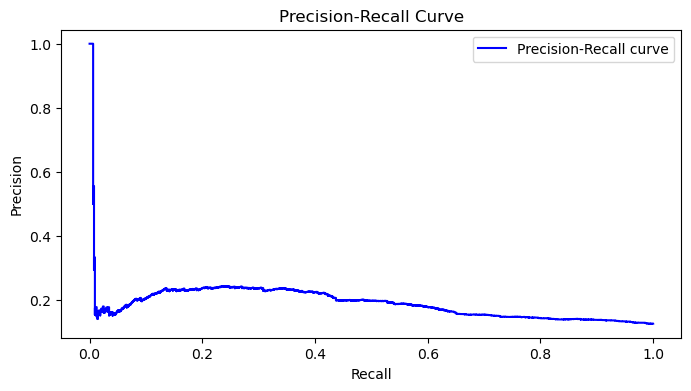

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26


In [563]:
LR_W2= LogisticRegression(solver='saga',class_weight='balanced',random_state=1234)

outcome3 = store_results("Logistic Regression_L1_WB",X_train, y_train,X_test, y_test, LR_W2, 5,"L1", 1,"Balanced")
Model_Comparison3 = Model_Comparison2.append (outcome3)
Model_Comparison3

## Feature Selection

Feature Selection will be done in this project by using

- VIF values.



#### Feature Elimination Using VIF

VIF is a variance inflation factor that gives the measure of collinearity of features. VIF is a measure of how well a predictor variable is correlated with all the other variables, excluding the target variable. If the VIF value of a feature is high, the feature can be represented as a combination of the other features. The features that can be represented as a combination of other features do not add information to the data, and they need to be eliminated in order to reduce noise.

In [564]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [565]:
col=['ID', 'NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL',
       'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'GENDER_M',
       'CAR_Y', 'REALITY_Y', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'INCOME_TYPE_Student',
       'INCOME_TYPE_Working', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher', 'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents']

In [566]:
len(X_train.columns)

30

In [567]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,EDUCATION_TYPE_Secondary / secondary special,373.14
17,EDUCATION_TYPE_Higher education,342.04
18,EDUCATION_TYPE_Incomplete higher,64.93
6,FAMILY SIZE,24.14
25,HOUSE_TYPE_House / apartment,18.71
19,EDUCATION_TYPE_Lower secondary,13.32
1,NO_OF_CHILD,11.70
29,HOUSE_TYPE_With parents,10.41
23,FAMILY_TYPE_Single / not married,9.03
26,HOUSE_TYPE_Municipal apartment,6.49


##### Let eliminate all features that have VIF value above 5

In [568]:
X_train_Original=X_train.copy() # copy X_train dataset
X_train=X_train[col]

### Note: Removing features using VIF must be done one by one, not all together, since removing one feature will impact the collinearity of the others as well.

In [569]:
def vif_calc (x_train):
  '''
  x_train = Training feature set
  '''
  vif = pd.DataFrame()
  vif['Features'] = x_train.columns
  vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  #print(vif.to_string())
  topval = vif.head(1)
  return topval

In [570]:
topval = vif.VIF.max()
while topval > 5:
  top = vif_calc(X_train)
  print(top["Features"].item(),"with vif=",topval )  
  X_train = X_train.drop ([top["Features"].item()], axis =1)
  topval = top["VIF"].item()

EDUCATION_TYPE_Secondary / secondary special with vif= 373.14
FAMILY SIZE with vif= 373.14
HOUSE_TYPE_House / apartment with vif= 24.14
FAMILY_TYPE_Married with vif= 18.7


In [571]:
len(X_train.columns)

26

Now we have 26 columns left with little collinearity. Now let's build a model with these columns and note the performace

In [572]:
x_test=X_test.copy()
x_train = X_train.copy()

x_test = x_test[x_train.columns]

### Logistic regression with selected features

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71      4396
           1       0.18      0.61      0.27       636

    accuracy                           0.59      5032
   macro avg       0.55      0.60      0.49      5032
weighted avg       0.82      0.59      0.66      5032

************************************************************


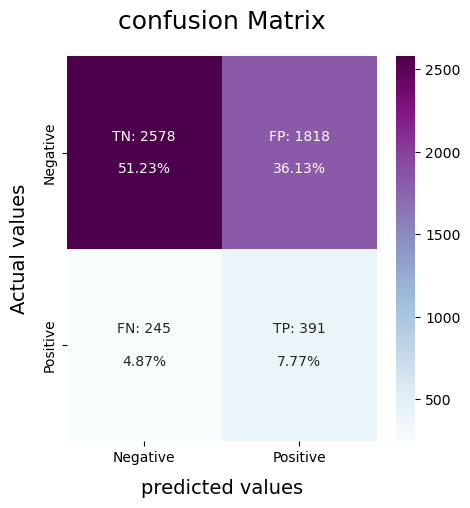

____________________________________________________________
train f1 score:

0.27
____________________________________________________________
test f1 score:

0.27
____________________________________________________________


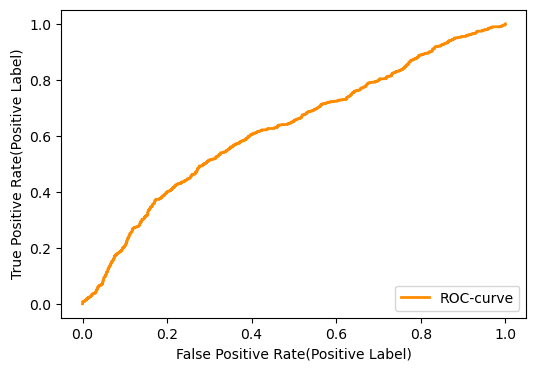

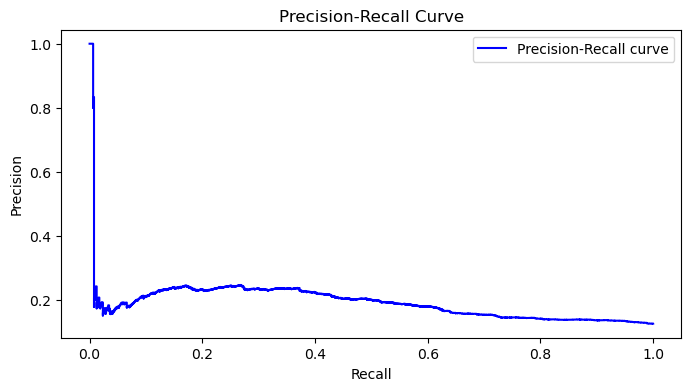

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression with selected features,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.58,0.27,0.26


In [573]:
outcome4 = store_results("Logistic Regression with selected features",x_train, y_train,x_test, y_test, LR_WB, 5,"L2", 1,"Balanced")
Model_Comparison4 = Model_Comparison3.append (outcome4)
Model_Comparison4

## """Decision Tree (with Hyperparameter Tuning with Grid Search )""""""

In [574]:
# Define the Target and Predictor

X1 = data_encoded.drop(['TARGET'], axis=1)
y1 = data_encoded['TARGET']

In [575]:
# Splitting the data
from sklearn.model_selection import train_test_split

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=0)

In [577]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20127, 30), (5032, 30), (20127,), (5032,))

In [578]:
from sklearn.tree import DecisionTreeClassifier

In [449]:
DT =DecisionTreeClassifier(class_weight='balanced',random_state=1234)
param= {'criterion':['gini','entropy'],'max_depth':range(3,12),'min_samples_split':[3,4,5,6],'min_samples_leaf':[2,3,4]}
model=GridSearchCV(DT,param,cv=5,scoring='f1')
model.fit(X_train,y_train)
model.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      4396
           1       0.42      0.89      0.57       636

    accuracy                           0.83      5032
   macro avg       0.70      0.85      0.73      5032
weighted avg       0.91      0.83      0.85      5032

************************************************************


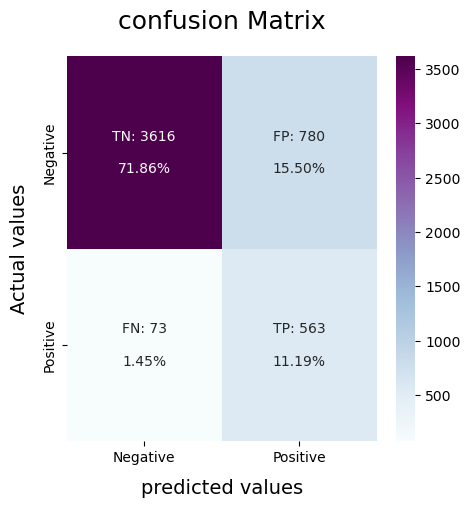

____________________________________________________________
train f1 score:

0.61
____________________________________________________________
test f1 score:

0.57
____________________________________________________________


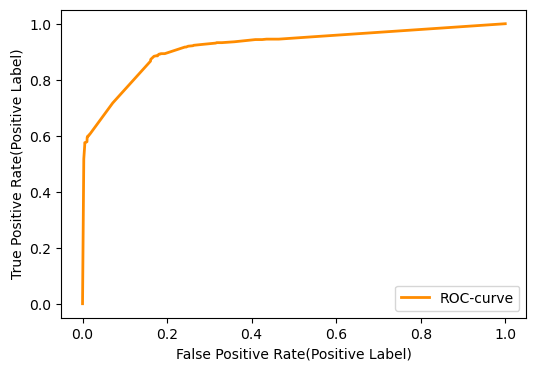

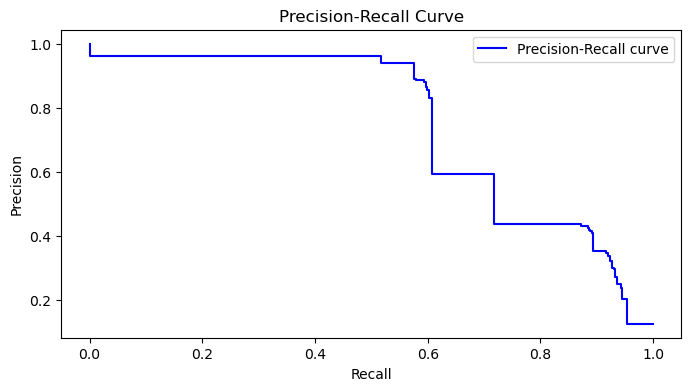

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression with selected features,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.58,0.27,0.26
0,Tuned Decision Tree with GridSearch,N/A,1,Balanced,0.91,0.85,0.83,0.61,0.57,0.85,0.60,0.64


In [579]:
DT=model.best_estimator_
outcome5 = store_results("Tuned Decision Tree with GridSearch",X_train, y_train,X_test, y_test, DT, 5,"N/A", 1,"Balanced")
Model_Comparison5 = Model_Comparison4.append (outcome5)
Model_Comparison5

## """Random Forest""""""

### For class_weight='balanced'

In [452]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
RF=RandomForestClassifier(random_state=1234)

classification_report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4396
           1       0.96      0.73      0.83       636

    accuracy                           0.96      5032
   macro avg       0.96      0.86      0.90      5032
weighted avg       0.96      0.96      0.96      5032

************************************************************


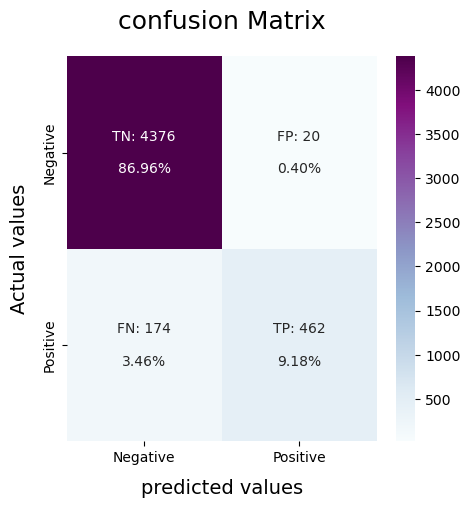

____________________________________________________________
train f1 score:

1.0
____________________________________________________________
test f1 score:

0.83
____________________________________________________________


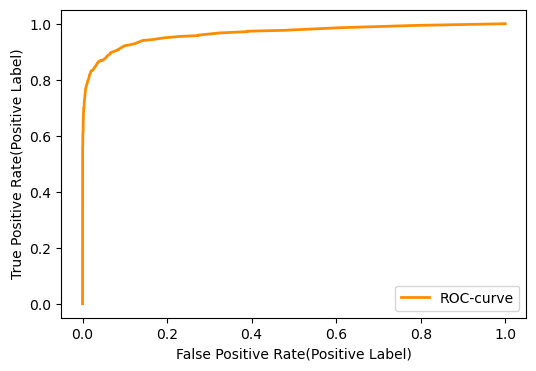

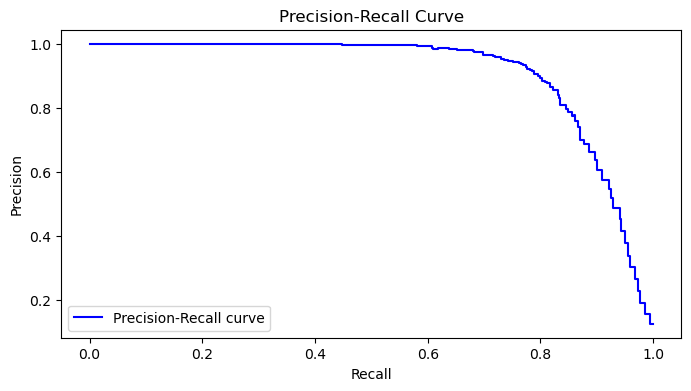

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression with selected features,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.58,0.27,0.26
0,Tuned Decision Tree with GridSearch,N/A,1,Balanced,0.91,0.85,0.83,0.61,0.57,0.85,0.60,0.64
0,Random Forests,N/A,1,Balanced,0.96,1.00,0.96,1.00,0.83,0.96,0.79,0.79


In [580]:
outcome6 = store_results("Random Forests",X_train, y_train,X_test, y_test, RF, 5,"N/A", 1,"Balanced")
Model_Comparison6 = Model_Comparison5.append (outcome6)
Model_Comparison6 

## """AdaBoost""""""

In [457]:
from sklearn.ensemble import AdaBoostClassifier

In [458]:
ada=AdaBoostClassifier(random_state=1234)

classification_report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      4396
           1       0.82      0.04      0.08       636

    accuracy                           0.88      5032
   macro avg       0.85      0.52      0.51      5032
weighted avg       0.87      0.88      0.83      5032

************************************************************


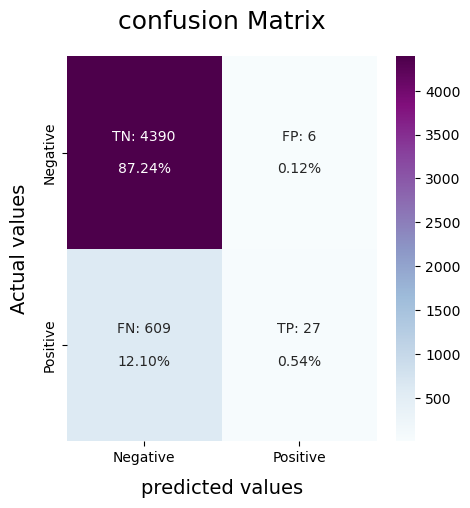

____________________________________________________________
train f1 score:

0.11
____________________________________________________________
test f1 score:

0.08
____________________________________________________________


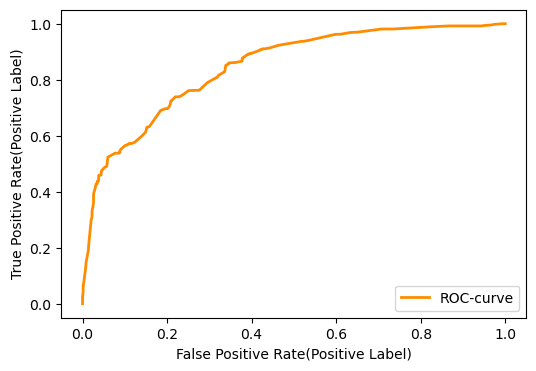

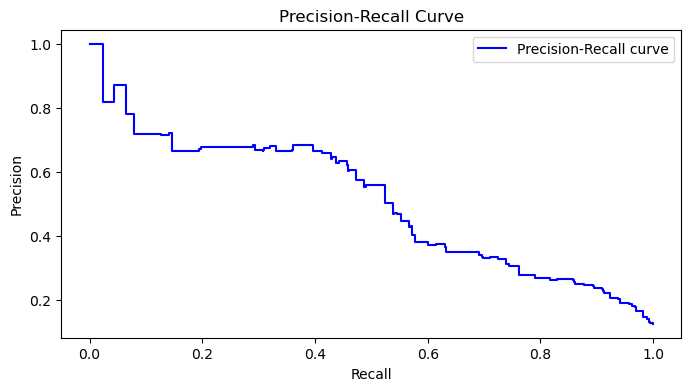

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression with selected features,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.58,0.27,0.26
0,Tuned Decision Tree with GridSearch,N/A,1,Balanced,0.91,0.85,0.83,0.61,0.57,0.85,0.60,0.64
0,Random Forests,N/A,1,Balanced,0.96,1.00,0.96,1.00,0.83,0.96,0.79,0.79
0,AdaBoost,N/A,1,Balanced,0.85,0.88,0.88,0.11,0.08,0.88,0.12,0.15


In [581]:
outcome7 = store_results("AdaBoost",X_train, y_train,X_test, y_test, ada, 5,"N/A", 1,"Balanced")
Model_Comparison7 = Model_Comparison6.append (outcome7)
Model_Comparison7

## Model Comparison

In [582]:
Model_Comparison7.sort_values(by="AUC", ascending=False)

,Model,Regularization,C,Class_Weight,AUC,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score,CrossVal_mean(Accuracy),CrossVal_mean(F1_score),Crossval1(f1)
0,Random Forests,N/A,1,Balanced,0.96,1.00,0.96,1.00,0.83,0.96,0.79,0.79
0,Tuned Decision Tree with GridSearch,N/A,1,Balanced,0.91,0.85,0.83,0.61,0.57,0.85,0.60,0.64
0,AdaBoost,N/A,1,Balanced,0.85,0.88,0.88,0.11,0.08,0.88,0.12,0.15
0,Logistic Regression_L2,L2,1,N/A,0.63,0.88,0.87,0.02,0.01,0.88,0.02,0.02
0,Logistic Regression_L2_WB,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression_L1_WB,L1,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.59,0.27,0.26
0,Logistic Regression with selected features,L2,1,Balanced,0.63,0.59,0.59,0.27,0.27,0.58,0.27,0.26
0,Dummy Classifier,N/A,N/A,N/A,0.50,0.88,0.87,0.00,0.00,0.88,0.00,0.00


### Visualization of the Model based on Test_F1_score and CrossVal_mean(F1_score)

In [583]:
Model_Comparison7['test_f1_score'] = Model_Comparison7['test_f1_score'] * 100

In [584]:
# Extracting 'Model' and modified 'test_f1_score' columns
selected_columns = Model_Comparison7[['Model', 'test_f1_score']]
selected_columns

,Model,test_f1_score
0,Dummy Classifier,0.00
0,Logistic Regression_L2,1.00
0,Logistic Regression_L2_WB,27.00
0,Logistic Regression_L1_WB,27.00
0,Logistic Regression with selected features,27.00
0,Tuned Decision Tree with GridSearch,57.00
0,Random Forests,83.00
0,AdaBoost,8.00


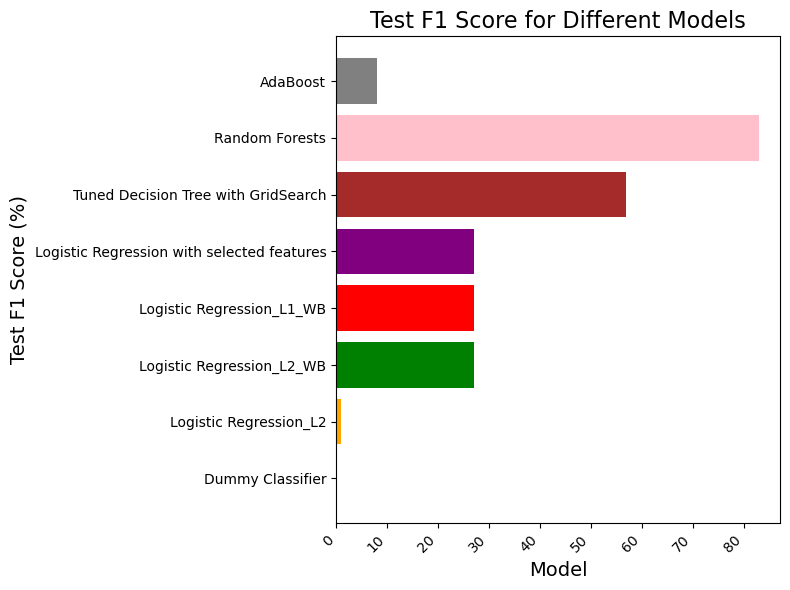

In [590]:
# Define colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Increase figure size and font size
plt.figure(figsize=(8, 6))
plt.barh(Model_Comparison7['Model'], Model_Comparison7['test_f1_score'], color=colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test F1 Score (%)', fontsize=14)
plt.title('Test F1 Score for Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [591]:
Model_Comparison7['CrossVal_mean(F1_score)'] = Model_Comparison7['CrossVal_mean(F1_score)'] * 100

In [592]:
# Extracting 'Model' and modified 'test_f1_score' columns
selected_columns1 = Model_Comparison7[['Model', 'CrossVal_mean(F1_score)']]
selected_columns1

,Model,CrossVal_mean(F1_score)
0,Dummy Classifier,0.00
0,Logistic Regression_L2,2.30
0,Logistic Regression_L2_WB,26.87
0,Logistic Regression_L1_WB,26.78
0,Logistic Regression with selected features,26.70
0,Tuned Decision Tree with GridSearch,59.53
0,Random Forests,79.44
0,AdaBoost,12.42


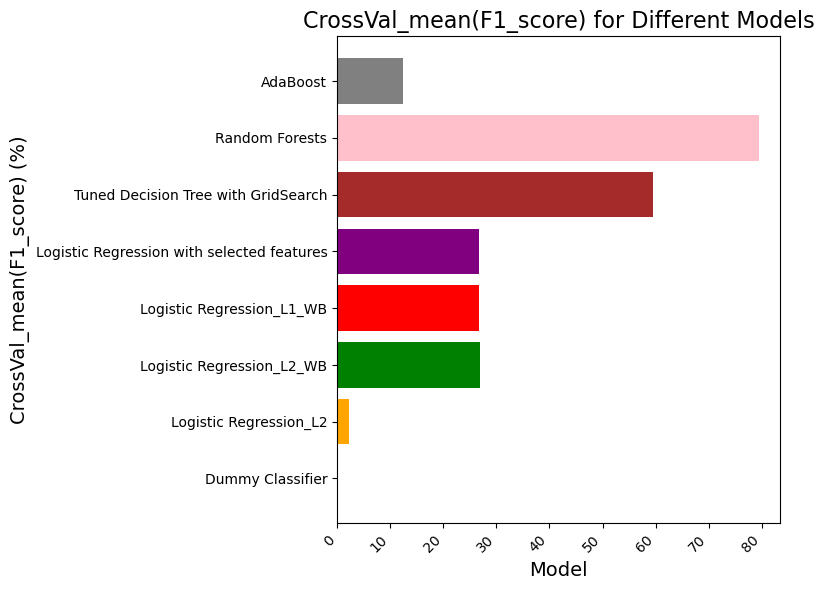

In [593]:
# Define colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Increase figure size and font size
plt.figure(figsize=(8, 6))
plt.barh(Model_Comparison7['Model'], Model_Comparison7['CrossVal_mean(F1_score)'], color=colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('CrossVal_mean(F1_score) (%)', fontsize=14)
plt.title('CrossVal_mean(F1_score) for Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Feature Importance for Random Forest

In [594]:
#Feature Importance
feature_importances = RF.feature_importances_
features = X_train.columns
feature_importances_df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(feature_importances_df)

<bound method DataFrame.nlargest of                                         features  importance
0                                             ID        0.30
1                                    NO_OF_CHILD        0.02
2                                         INCOME        0.11
3                                     WORK_PHONE        0.02
4                                          PHONE        0.02
5                                         E_MAIL        0.01
6                                    FAMILY SIZE        0.03
7                                    BEGIN_MONTH        0.09
8                                            AGE        0.12
9                                 YEARS_EMPLOYED        0.10
10                                      GENDER_M        0.02
11                                         CAR_Y        0.02
12                                     REALITY_Y        0.02
13                         INCOME_TYPE_Pensioner        0.00
14                     INCOME_TYPE_State servant 

In [595]:
pd.set_option('display.max_rows', None)
feature_importances_df = pd.DataFrame({'features': features, 'importance': feature_importances})
feature_importances_df.sort_values(by="importance", ascending=False)

,features,importance
0,ID,0.30
8,AGE,0.12
2,INCOME,0.11
9,YEARS_EMPLOYED,0.10
7,BEGIN_MONTH,0.09
6,FAMILY SIZE,0.03
12,REALITY_Y,0.02
10,GENDER_M,0.02
11,CAR_Y,0.02
16,INCOME_TYPE_Working,0.02


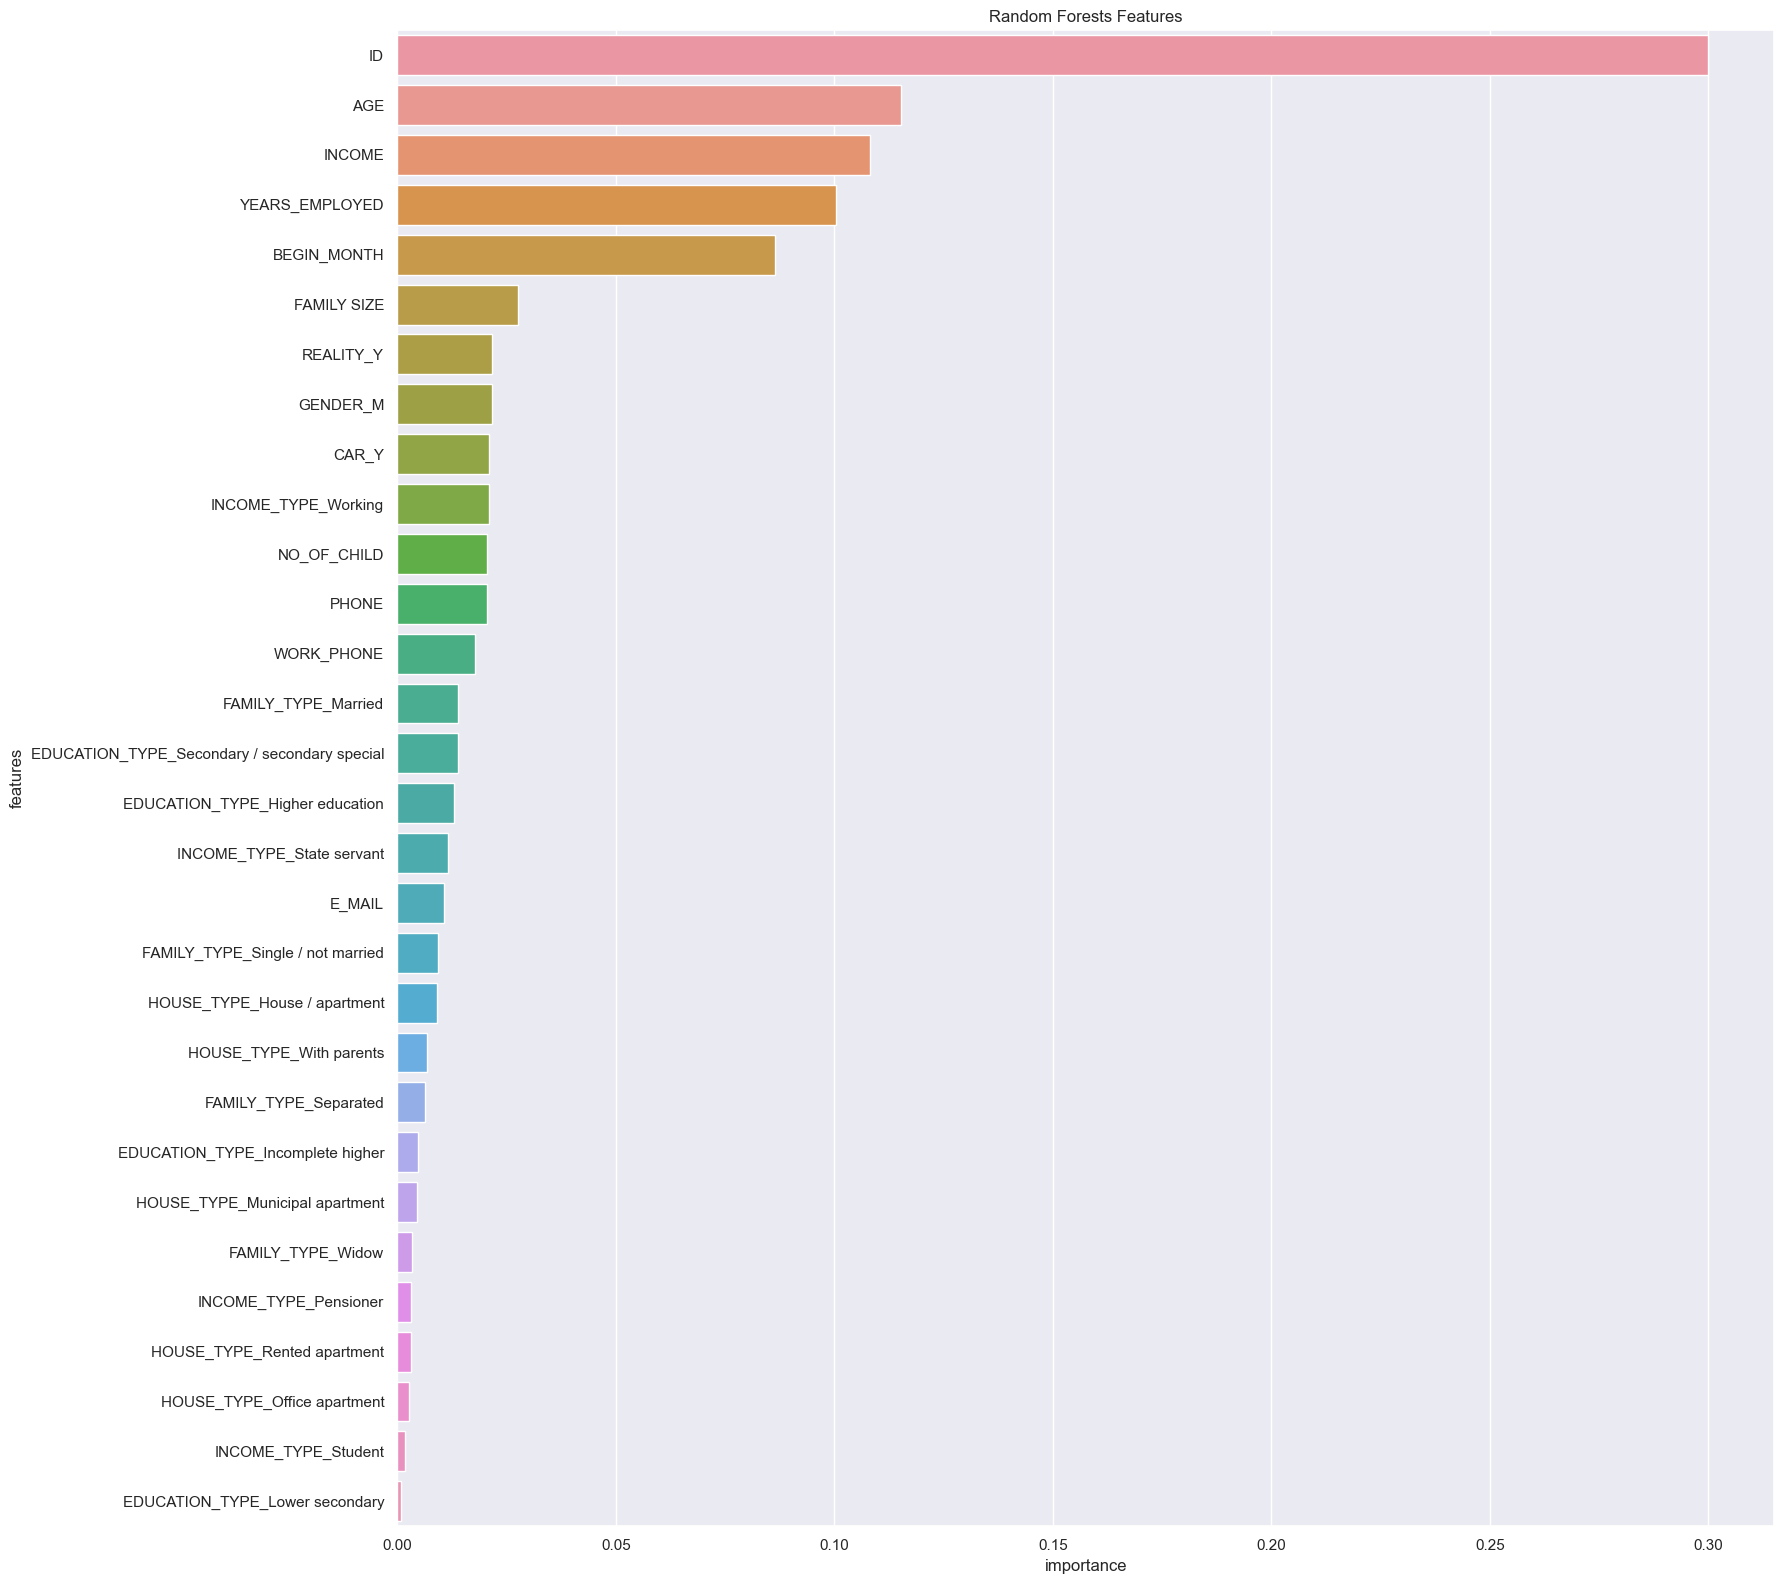

In [596]:
imp=feature_importances_df.sort_values(by="importance", ascending=False).head(30)
plt.figure(figsize=(18, 16))
sns.set(font_scale = 1)
sns.barplot(x="importance", y="features", data=imp.sort_values(by="importance", ascending=False))
plt.title('Random Forests Features')
plt.tight_layout()
plt.show()

# Model Evaluation for Target (credit card fraud detection)

The task of predicting the credit card fraud detection is essentially a classification problem where we aim to forecast if a customer is target as credit card fraud or not. The selection of an optimal model should be guided by various criteria, encompassing performance metrics and the specific goals related to the problem at hand. Below is a detailed analysis based on the metrics provided:

## 1. AUC (Area Under the ROC Curve)

AUC provides an aggregate measure of model performance over all potential classification thresholds. A higher AUC is preferable as it indicates the models capability to differentiate betweencthe positive and negative classes.

## 2. Accuracy

Accurancy quantifies the fraction of correct predictions out of all the predictions made.However, it is crutial to note that accuracy might not always be the ideal metric, especially in the scenarios with imbalanced datasets.

## 3. F1 Score

The F1 Score is a balanced mean for precision and recall, thereby providing a harmonized perspective on the model's performance. This is especially useful in contexts where the dataset is imbalanced.

From the given table:

- The AUC score  ranging around 0.50-0.96 for all the model. This consistency suggests that the discrimination power varies. Models with higher AUC scores are better at distinguishing between positive and negative instances.In the context of fraud detection, it suggests that the model is effective at distinguishing between fraudulent and non-fraudulent transactions.
  
- The model **Random Forest** with the 'Balanced' class weight achieves the highest test F1 score, registering at 0.83. Other variations of Tuned decision trees with GridSearchCv Hyperparameter  with specific class weights is 0.57.

- The Random Forest model, trained on a balanced dataset, shows promising results with high AUC and F1 scores on the test set. The model is effective at identifying fraudulent transactions while maintaining a good balance between precision and recall. 

**Recommendation**:

- If the goal is a **balanced performance** that equally weighs both precision and recall (which is especially relevant in imbalanced datasets), the **Random Forest** model with a 'Balanced' class weight emerges as a strong contender due to its leading F1 score.

- If the overarching objective revolves around overall accuracy while effectively distinguishing between positive and negative classes, models with a higher AUC combined with respectable F1 scores might be considered.

- **Model Deployment and Monitoring**: Deploy the trained Random Forest model in a real-world environment for ongoing fraud detection and implement continuous monitoring of the model's performance to ensure its effectiveness over time.

## Prepared and Submitted by

 * **Yannick Sorel BENGA BENGUA**

# THANK YOU